# JetClass PMNN Plotting

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def sort_legend_items(items):
    return sorted(items, key=lambda x: (len(x), x))


In [5]:
import pandas as pd
import warnings
import numpy as np

# Suppress all warnings
warnings.filterwarnings('ignore')


# Load the DataFrame
results_df = pd.read_csv('jetclass_PMNN_paper_h4q_trainings.csv').sort_values('overall_accuracy', ascending=False)
results_df['base_name'] = results_df['model_id'].str.split('_batch1024').str[1:].str[0]
# Split the 'base_name' column to extract the relevant components
split_columns = results_df['base_name'].str.split('_', expand=True)

# Assigning the last four elements to new columns
results_df[['particle_geom', 'particle_dim']] = split_columns.iloc[:, 1:3]

# Convert 'particle_dim' and 'jet_dim' to integers
results_df['particle_dim'] = results_df['particle_dim'].astype(int)
# results_df['jet_dim'] = results_df['jet_dim'].astype(int)

results_df['particle_dim'] = results_df.apply(
    lambda row: row['particle_dim'] * 2 if len(row['particle_geom']) > 1 else row['particle_dim'],
    axis=1
)

# Remove the original 'base_name' column if it's no longer needed
results_df.drop(columns=['base_name'], inplace=True)

# Create a list of tuples for the MultiIndex
index_tuples = list(results_df[['particle_geom', 'particle_dim']].itertuples(index=False, name=None))

# Create a MultiIndex
index = pd.MultiIndex.from_tuples(index_tuples, names=['particle_geom', 'particle_dim'])

# Assign the MultiIndex to the DataFrame
results_df.index = index
# Define a function to average the top 2 'overall_accuracy' for each unique (particle_geom, particle_dim) combination

results_df.drop(columns=['particle_geom', 'particle_dim'], inplace=True)

df_reset = results_df.reset_index()

# Group by the columns and select the rows with the maximum 'overall_accuracy' for each group
best_rows_df = df_reset.loc[df_reset.groupby(['particle_geom', 'particle_dim'])['overall_accuracy'].idxmax()]
best_rows_df = best_rows_df.set_index(['particle_geom', 'particle_dim'])


# pmnn_h4q_df = calculate_mean_std(results_df,top_n =3)
pmnn_h4q_df=best_rows_df.drop([('R',64),('RxH',64),('RxR',64),('RxS',64),('HxS',64)])


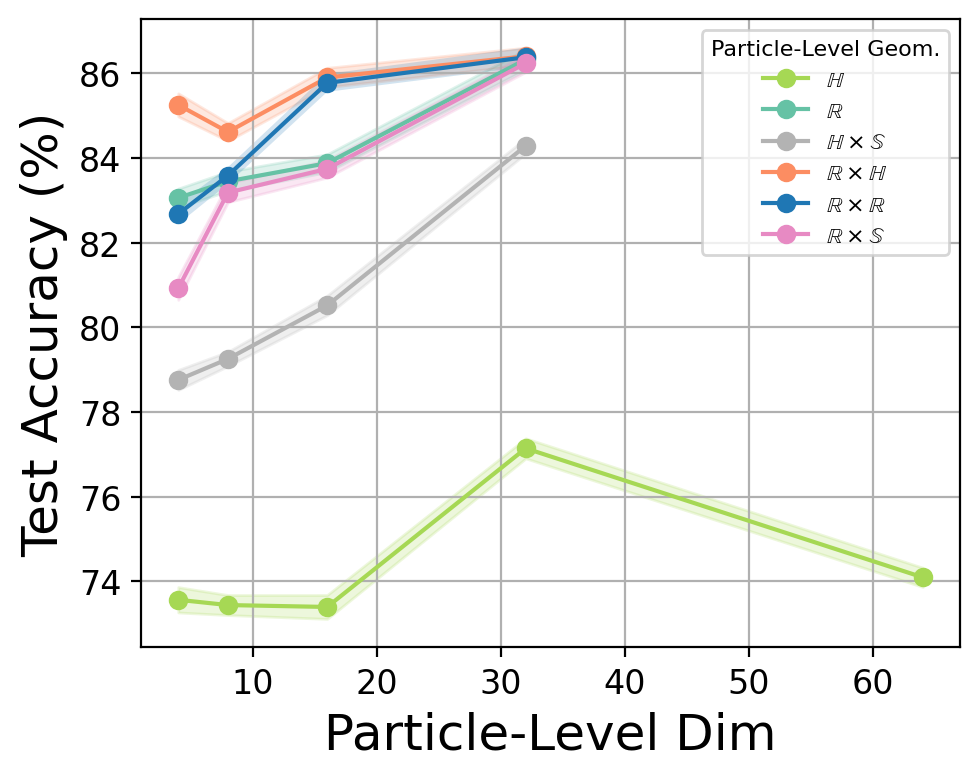

In [26]:
# Assuming 'processed_df' is your DataFrame after processing with 'calculate_mean_std'
# Define filter values

# Plot the highest accuracies
plot_highest_accuracies(
    df=pmnn_h4q_df,
    variable_to_vary='particle_dim',
    metric_column='accuracy',
    figsize = (5,4),
#     acc_range=(0, 100),
    title='Overall Accuracy',
    plot_trans_params = False,
    PMNN=True,
#     plot_best=True,
    shaded_plot=True,
    shade_by_std=True,
    filter_names=['S'],  # Adjust as needed
    show_legend = True,
    show_grid=True,
    color_dict=None  # Use default colors or provide your own
)


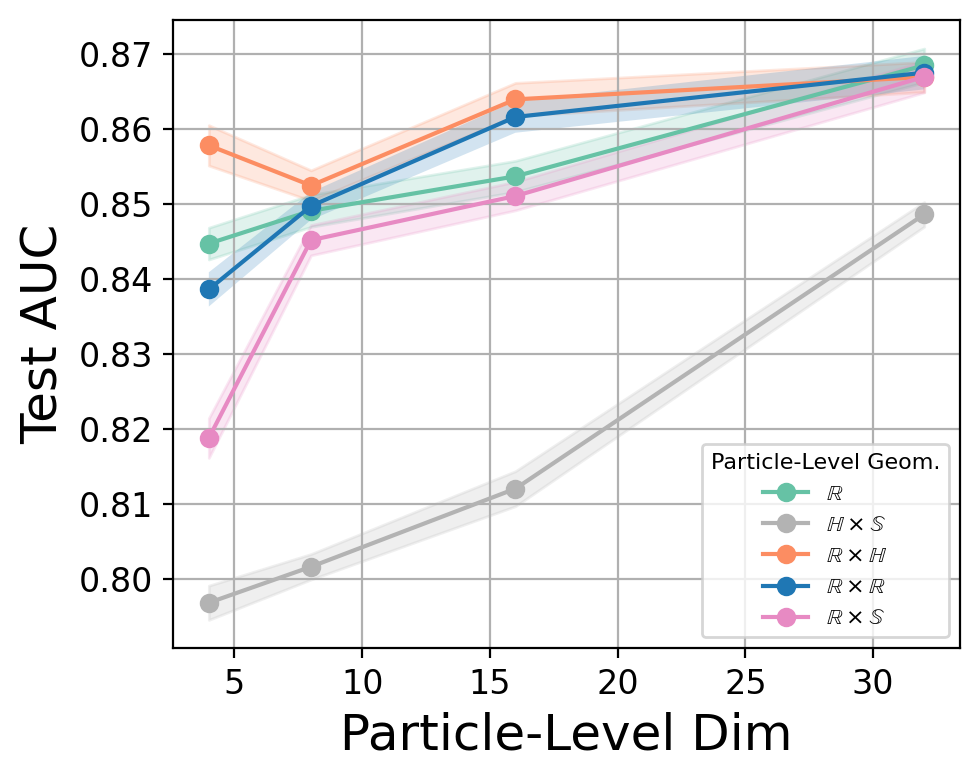

In [27]:
# Assuming 'processed_df' is your DataFrame after processing with 'calculate_mean_std'
# Define filter values

# Plot the highest accuracies
plot_highest_accuracies(
    df=pmnn_h4q_df,
    variable_to_vary='particle_dim',
    metric_column='auc',
    scale =1,
    y_label = 'Test AUC',
    figsize = (5,4),
#     acc_range=(0, 100),
    title='Overall Accuracy',
    plot_trans_params = False,
    PMNN=True,
#     plot_best=True,
    shaded_plot=True,
    shade_by_std=True,
    filter_names=['H','S'],  # Adjust as needed
    show_legend = True,
    color_dict=None  # Use default colors or provide your own
)


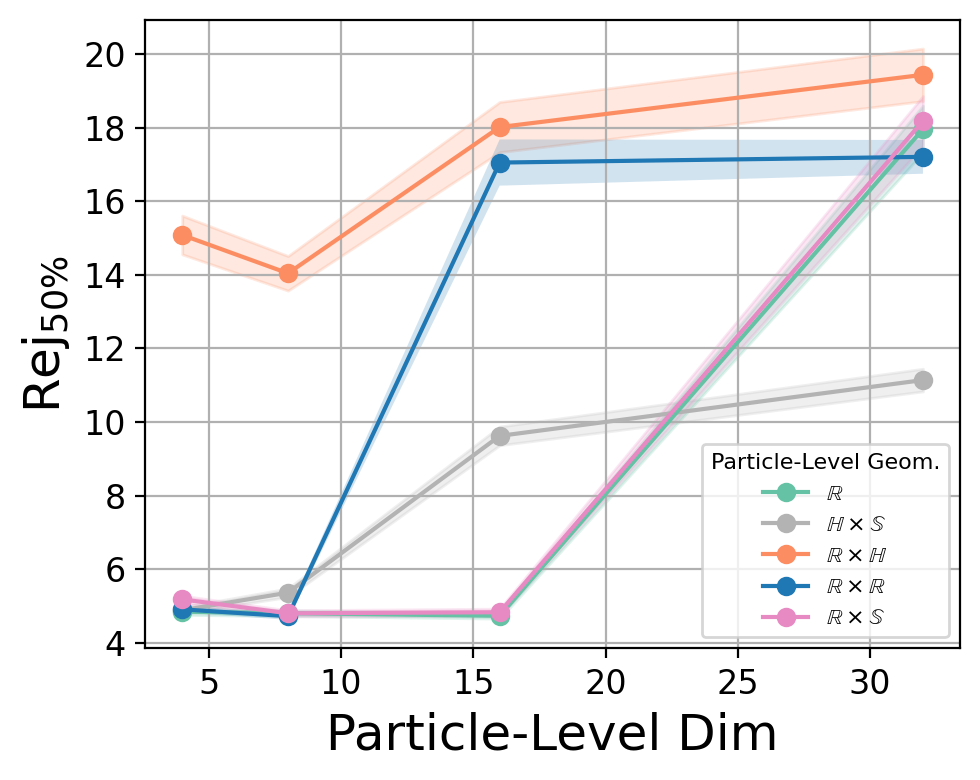

In [13]:
# Assuming 'processed_df' is your DataFrame after processing with 'calculate_mean_std'
# Define filter values

# Plot the highest accuracies
plot_highest_accuracies(
    df=pmnn_h4q_df,
    variable_to_vary='particle_dim',
    metric_column='h4q_rejection_50',
    scale = 1, 
    y_label = f'$\\text{{Rej}}_{{50\%}}$',
    figsize = (5,4),
#     acc_range=(0, 100),
    title='Rejection',
    plot_trans_params = False,
    PMNN=True,
#     plot_best=True,
    shaded_plot=True,
    shade_by_std=True,
    filter_names=['H','S'],  # Adjust as needed
    show_legend = True,
    color_dict=None  # Use default colors or provide your own
)

In [14]:
import pandas as pd
import warnings
import numpy as np

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load the DataFrame
results_df = pd.read_csv('jetclass_PMNN_paper_tbqq_trainings.csv').sort_values('overall_accuracy', ascending=False)
results_df['base_name'] = results_df['model_id'].str.split('_batch1024').str[1:].str[0]

# Split the 'base_name' column to extract the relevant components
split_columns = results_df['base_name'].str.split('_', expand=True)

# Assigning the last four elements to new columns
results_df[['particle_geom', 'particle_dim']] = split_columns.iloc[:, 1:3]

# Convert 'particle_dim' and 'jet_dim' to integers
results_df['particle_dim'] = results_df['particle_dim'].astype(int)
# results_df['jet_dim'] = results_df['jet_dim'].astype(int)

# results_df['particle_dim'] = results_df.apply(
#     lambda row: row['particle_dim'] * 2 if len(row['particle_geom']) > 1 else row['particle_dim'],
#     axis=1
# )

# # Multiply 'jet_dim' by 2 if the length of 'jet_geom' is greater than 1
# results_df['jet_dim'] = results_df.apply(
#     lambda row: row['jet_dim'] * 2 if len(row['jet_geom']) > 1 else row['jet_dim'],
#     axis=1
# )



# Remove duplicates by keeping the row with the highest overall_accuracy
# results_df = results_df.sort_values('overall_accuracy', ascending=False)
# .drop_duplicates(
#     subset=['particle_geom', 'particle_dim'], keep='first'
# )

# Remove the original 'base_name' column if it's no longer needed
results_df.drop(columns=['base_name'], inplace=True)

# Create a list of tuples for the MultiIndex
index_tuples = list(results_df[['particle_geom', 'particle_dim']].itertuples(index=False, name=None))

# Create a MultiIndex
index = pd.MultiIndex.from_tuples(index_tuples, names=['particle_geom', 'particle_dim'])


results_df.drop(columns=['particle_geom', 'particle_dim'], inplace=True)

# Assign the MultiIndex to the DataFrame
results_df.index = index


df_reset = results_df.reset_index()

# Group by the columns and select the rows with the maximum 'overall_accuracy' for each group
best_rows_df = df_reset.loc[df_reset.groupby(['particle_geom', 'particle_dim'])['overall_accuracy'].idxmax()]
best_rows_df = best_rows_df.set_index(['particle_geom', 'particle_dim'])




# pmnn_tbqq_df = calculate_mean_std(results_df,top_n =3)
pmnn_tbqq_df = best_rows_df.drop(('R',64))



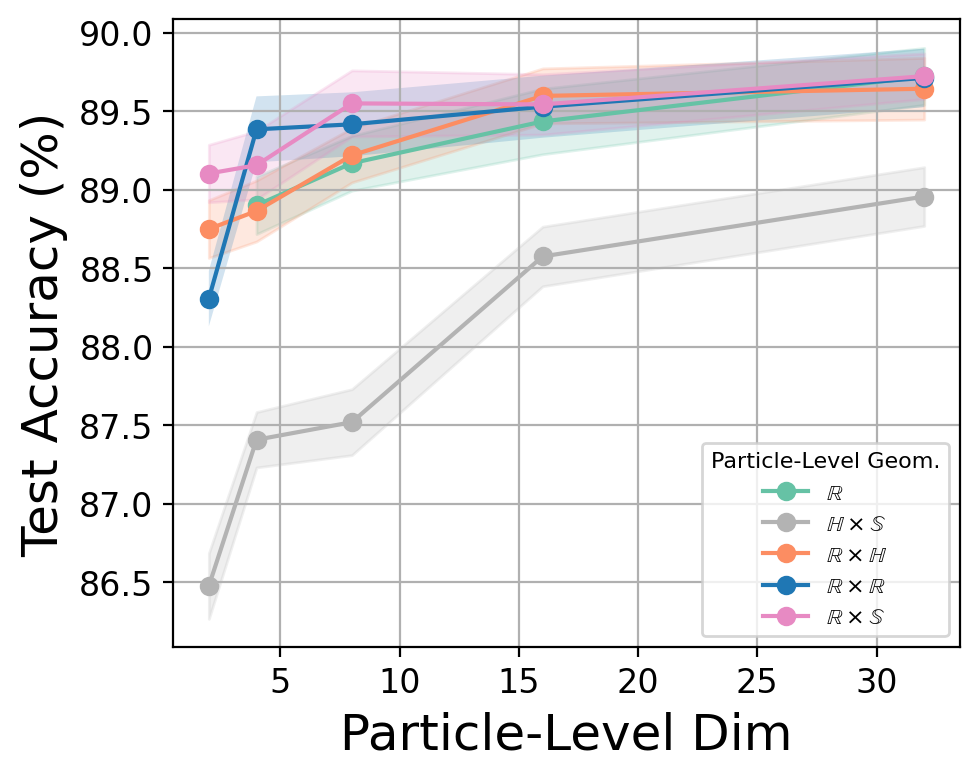

In [19]:
# Assuming 'processed_df' is your DataFrame after processing with 'calculate_mean_std'
# Define filter values

# Plot the highest accuracies
plot_highest_accuracies(
    df=pmnn_tbqq_df,
    variable_to_vary='particle_dim',
    metric_column='accuracy',
    figsize = (5,4),
#     acc_range=(0, 100),
    title='Overall Accuracy',
    plot_trans_params = False,
    PMNN=True,
#     plot_best=True,
    shaded_plot=True,
    shade_by_std=True,
    filter_names=['H','S'],  # Adjust as needed
    show_legend = True,
    color_dict=None  # Use default colors or provide your own
)


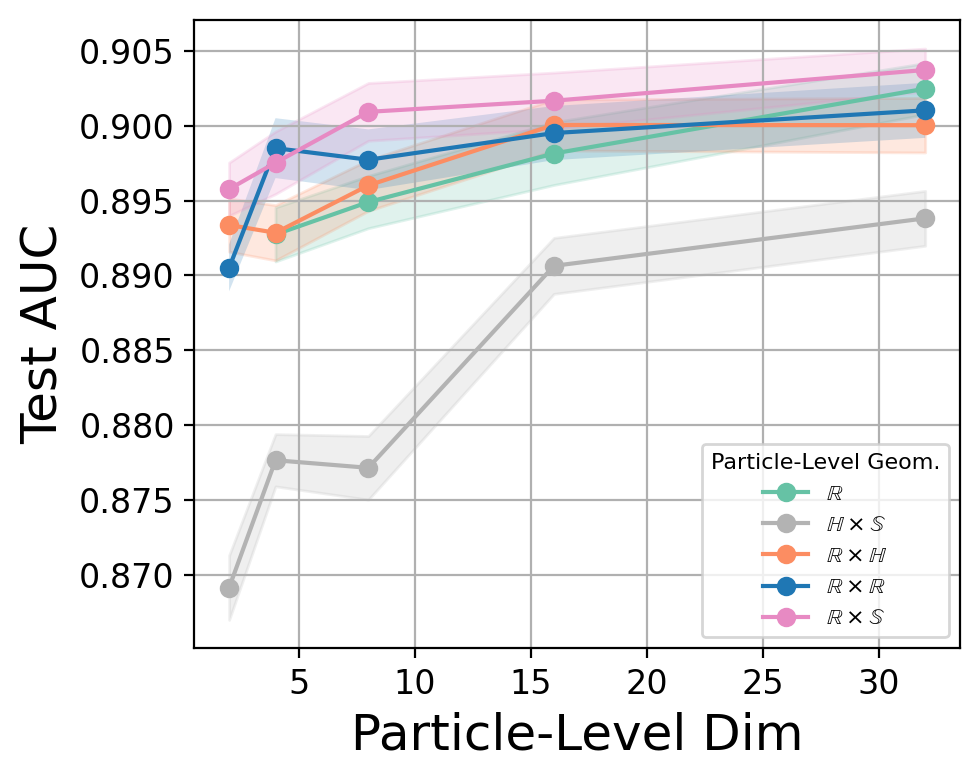

In [16]:
# Assuming 'processed_df' is your DataFrame after processing with 'calculate_mean_std'
# Define filter values

# Plot the highest accuracies
plot_highest_accuracies(
    df=pmnn_tbqq_df,
    variable_to_vary='particle_dim',
    metric_column='auc',
    scale = 1, 
    y_label = 'Test AUC',
    figsize = (5,4),
#     acc_range=(0, 100),
    title='Overall Accuracy',
    plot_trans_params = False,
    PMNN=True,
#     plot_best=True,
    shaded_plot=True,
    shade_by_std=True,
    filter_names=['H','S'],  # Adjust as needed
    show_legend = True,
    color_dict=None  # Use default colors or provide your own
)

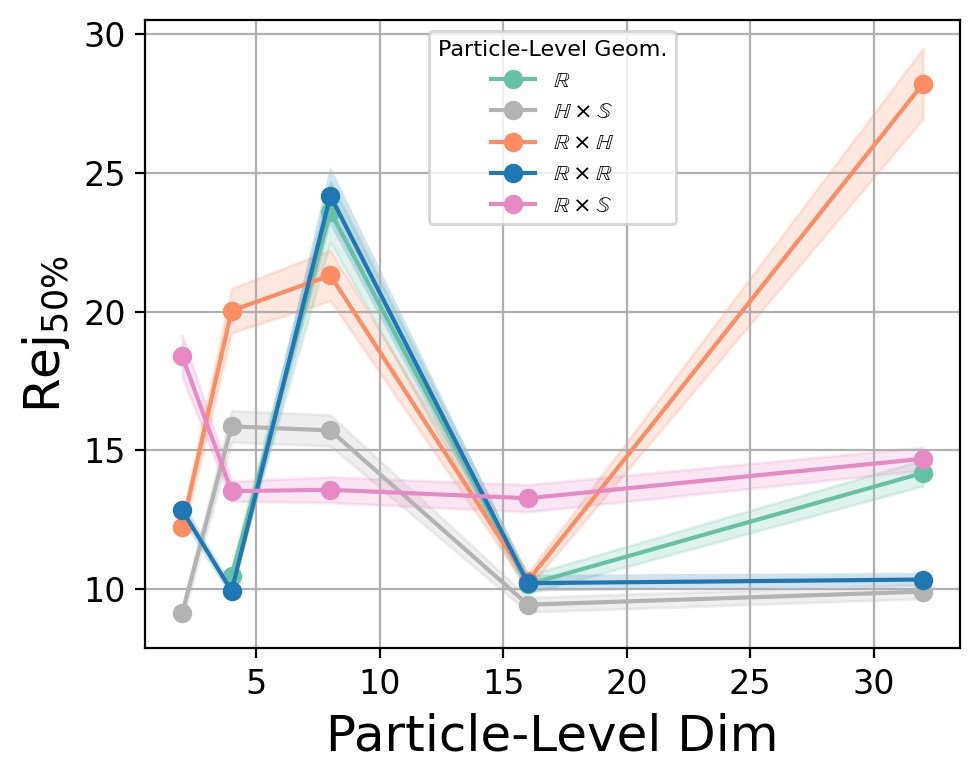

In [127]:
# Assuming 'processed_df' is your DataFrame after processing with 'calculate_mean_std'
# Define filter values

# Plot the highest accuracies
plot_highest_accuracies(
    df=pmnn_tbqq_df,
    variable_to_vary='particle_dim',
    metric_column='tbqq_rejection_50',
    scale = 1, 
    y_label = f'$\\text{{Rej}}_{{50\%}}$',
    figsize = (5,4),
#     acc_range=(0, 100),
    title='Overall Accuracy',
    plot_trans_params = False,
    PMNN=True,
#     plot_best=True,
    shaded_plot=True,
    shade_by_std=True,
    filter_names=['H','S'],  # Adjust as needed
    show_legend = True,
    color_dict=None  # Use default colors or provide your own
)

# JetClass Transformer Plotting 

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_highest_accuracies(df, 
                            variable_to_vary, 
                            metric_column='acc', 
                            filter_values=None, 
                            acc_range=None,
                            title=None,
                            PMNN=False,
                            plot_trans_params=False,
                            hide_fig=False,
                            show_grid=True,
                            plot_only_best=False,
                            shaded_plot=False, 
                            y_label = 'Test Accuracy (%)',
                            scale = 100, 
                            shade_by_std=False, 
                            filter_names=['none'],
                            show_legend = True,
                            color_dict=None,
                            figsize = (10,6)):
    # Identify the columns that will remain constant
    if not PMNN:
        remaining_columns = ['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim']
    else:
        remaining_columns = ['particle_geom', 'particle_dim']
    
    # Remove any None values from remaining_columns
    remaining_columns = [col for col in remaining_columns if col is not None]

    if variable_to_vary in remaining_columns:
        remaining_columns.remove(variable_to_vary)
    else:
        raise ValueError(f"{variable_to_vary} not found in remaining_columns.")

    # If filtering values are provided, apply them to the DataFrame
    if filter_values:
        for col, val in filter_values.items():
            if val == 'match' and col in ['particle_geom', 'jet_geom']:
                # Select rows where 'particle_geom' and 'jet_geom' are the same
                df = df[df.index.get_level_values('particle_geom') == df.index.get_level_values('jet_geom')]
            else:
                df = df[df.index.get_level_values(col) == val]

    # Define colors if not provided
    if color_dict is None:
        colormap = plt.get_cmap('Set2', 6)
        color_dict = {
            'R': colormap(0),
            'RxH': colormap(1),
            'RxS': colormap(2),
            'H': colormap(3),
            'S': colormap(4),
            'HxS': colormap(5)
        }

    # Group by the remaining columns
    grouped = df.groupby(remaining_columns)

    plt.figure(figsize=figsize, facecolor='white',dpi = 200)
    sorted_handles_labels = []

    for name, group in grouped:
        if PMNN:
            raw_name = name
            name_label = correct_string_to_latex(name)
            leg_title = 'Particle-Level Geom.'
        else:
            if 'particle_geom' in filter_values:
                raw_name = name[-1]
                name_label = correct_string_to_latex(name[-1])
                leg_title = 'Jet-Level Geom.'
            else:
                raw_name = name[0]
                name_label = correct_string_to_latex(name[0])
                leg_title = 'Particle-Level Geom.'
        
        if raw_name in filter_names:
            continue

        # Access the statistics from the DataFrame
        try:
            # Construct the column names
            metric_mean_col = f'{metric_column}_mean'
            metric_std_col = f'{metric_column}_std'

            x_values = group.index.get_level_values(variable_to_vary).values
            # Sort the values for plotting
            sorted_indices = np.argsort(x_values)
            x_values = x_values[sorted_indices]

            mean_values = group[metric_mean_col].values[sorted_indices]
            std_values = group[metric_std_col].values[sorted_indices]
       
            
            if plot_trans_params:
                PM_model_sizes ={ 
                        '32': 23.85,
                        '48': 46.03,
                        '64': 76.48,
                        '96': 162.14,
                        '128': 280.82,
                        '160': 466.28,
                        '176': 560.69,
                        '200': 718.75,
                        '240': 1040,
                        '192': 1010,
                        '256': 1090}
                M_model_sizes ={
                        '16': 14.28,
                        '32': 41.03,
                        '48':84.48,
                        '64': 144.64 ,
                        '96': 315.06,
                        '128': 552.3, 
                        '144': 695.98,
                        '160': 856.36,
                        '256': 2170}
                model_dims = x_values

                if 'x' in raw_name:
                    model_params = [PM_model_sizes[str(m)] for m in model_dims]
                else:
                    model_params = [M_model_sizes[str(m)] for m in model_dims]
                x_values = model_params
            
                

            # Plot only best values if requested
            
            # Plot mean values with optional shading
            lines = plt.plot(x_values, scale*mean_values, marker='o', label=f"{name_label}", color=color_dict.get(raw_name, None))
            line = lines[0]
            plt.fill_between(x_values, 
                             scale*(mean_values - std_values),
                             scale*(mean_values + std_values), 
                             color=color_dict.get(raw_name, None), alpha=0.2)
            

            if line is not None:
                sorted_handles_labels.append((line, f"{name_label}"))


        except KeyError as e:
            print(f"KeyError encountered: {e}")
            continue

    # Set labels and legend
    x_label = 'Particle-Level Dim' if variable_to_vary == 'particle_dim' else 'Jet-Level Dim'
    if plot_trans_params:
        x_label = 'Model Parameters (1k)'
    plt.xlabel(x_label, fontsize = 18)
    plt.ylabel(y_label, fontsize = 18)
    
    ax = plt.gca()

    # Set x-ticks

    ax.tick_params(axis='x', which='major', labelsize=12)
    ax.tick_params(axis='y', which='major', labelsize=12)

    if sorted_handles_labels and show_legend:
        handles_labels_dict = {}
        for handle, label in sorted_handles_labels:
            handles_labels_dict[label] = handle  # Overwrite duplicates

        sorted_labels = sorted(handles_labels_dict.keys(), key=lambda x: (len(x), x.lower()))
        sorted_handles = [handles_labels_dict[label] for label in sorted_labels]

        plt.legend(sorted_handles, sorted_labels, title=f'{leg_title}',title_fontsize = 8,  fontsize=8)#, loc='lower right')

    plt.grid(show_grid)
    plt.tight_layout()
    if acc_range is not None:
        plt.ylim(*acc_range)
    if not hide_fig:
        plt.show()
    else:
        plt.close()


In [8]:
def calculate_mean_std(results_df, top_n=None):
    # Group the DataFrame by all levels of the multi-index
    grouped = results_df.groupby(level=list(range(results_df.index.nlevels)))

    def calc_stats(df):
        # Reset index to avoid issues with duplicate indices
        df = df.reset_index(drop=True)

        # Select columns with float data types
        float_cols = df.select_dtypes(include='float').columns

        # If top_n is specified, select the top n models based on 'overall_accuracy'
        if top_n is not None:
            df_top = df.nlargest(top_n, 'overall_accuracy')
        else:
            df_top = df

        # Create a dictionary to hold all statistics
        stats_dict = {}

        # For each float column, calculate mean, std, min, max
        for col in float_cols:
            stats_dict[f'{col}_mean'] = df_top[col].mean()
            stats_dict[f'{col}_std'] = df_top[col].std()
            stats_dict[f'{col}_min'] = df_top[col].min()
            stats_dict[f'{col}_max'] = df_top[col].max()
#             stats_dict[f'{col}_best'] = df_top[col].max()  # Best is the maximum value over the group

        # Return a Series
        return pd.Series(stats_dict)

    # Apply the calc_stats function to each group
    result = grouped.apply(calc_stats)

    # Reset index to flatten the DataFrame if needed
    result = result.reset_index()

    # Set the index back to the original index columns
    index_columns = results_df.index.names
    result = result.set_index(index_columns)

    # Ensure all index levels are properly named
    result.index.names = index_columns

    return result


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_rejections(df, 
                    variable_to_vary, 
                    metric_column='acc', 
                    filter_values=None, 
                    acc_range=None,
                    title=None,
                    PMNN=False,
                    rejection=30,
                    classes=None,
                    top_n=None,
                    plot_trans_params=False,
                    color_dict=None,
                    filter_names=[None],
                    save_legend=True):  # Added parameter
    # Identify the columns that will remain constant
    if not PMNN:
        remaining_columns = ['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim']
    else:
        remaining_columns = ['particle_geom', 'particle_dim']

    # Remove any None values from remaining_columns
    remaining_columns = [col for col in remaining_columns if col is not None]

    if variable_to_vary in remaining_columns:
        remaining_columns.remove(variable_to_vary)
    else:
        raise ValueError(f"{variable_to_vary} not found in remaining_columns.")

    # If filtering values are provided, apply them to the DataFrame
    if filter_values:
        for col, val in filter_values.items():
            if val == 'match' and col in ['particle_geom', 'jet_geom']:
                # Select rows where 'particle_geom' and 'jet_geom' are the same
                df = df[df.index.get_level_values('particle_geom') == df.index.get_level_values('jet_geom')]
            else:
                df = df[df.index.get_level_values(col) == val]

    # Define colors if not provided
    if color_dict is None:
        colormap = plt.get_cmap('Set2', 6)
        color_dict = {
            'R': colormap(0),
            'RxH': colormap(1),
            'RxS': colormap(2),
            'H': colormap(3),
            'S': colormap(4),
            'HxS': colormap(5)
        }

    # Group by the remaining columns
    grouped = df.groupby(remaining_columns)

    # Loop over each class to plot a separate graph
    for class_label in classes:
        print(f"Plotting for class: {class_label}")
        plt.figure(figsize=(10, 8), facecolor='white')
        sorted_handles_labels = []
        for name, group in grouped:
            if PMNN:
                raw_name = name
                name_label = correct_string_to_latex(name)
                leg_title = 'Particle-Level Geom.'
            else:
                if 'particle_geom' in filter_values:
                    raw_name = name[-1]
                    name_label = correct_string_to_latex(name[-1])
                    leg_title = 'Jet-Level Geom.'
                else:
                    raw_name = name[0]
                    name_label = correct_string_to_latex(name[0])
                    leg_title = 'Particle-Level Geom.'
                    
            if raw_name in filter_names:
                continue

            # Access the statistics from the DataFrame
            try:
                # Construct the column names
                column_name_full = f'{class_label}_rejection_{rejection}'

                mean_col_name = f'{column_name_full}_mean'
                std_col_name = f'{column_name_full}_std'

                x_values = group.index.get_level_values(variable_to_vary).values

                # Sort the values for plotting
                sorted_indices = np.argsort(x_values)
                x_values = x_values[sorted_indices]
                if plot_trans_params:
                    PM_model_sizes ={ 
                            '32': 23.85,
                            '48': 46.03,
                            '64': 76.48,
                            '96': 162.14,
                            '128': 280.82,
                            '160': 466.28,
                            '176': 560.69,
                            '200': 718.75,
                            '240': 1040,
                            '192': 1010,
                            '256': 1090}
                    M_model_sizes ={
                            '16': 14.28,
                            '32': 41.03,
                            '48':84.48,
                            '64': 144.64 ,
                            '96': 315.06,
                            '128': 552.3, 
                            '144': 695.98,
                            '160': 856.36,
                            '256': 2170}
                    model_dims = x_values

                    if 'x' in raw_name:
                        model_params = [PM_model_sizes[str(m)] for m in model_dims]
                    else:
                        model_params = [M_model_sizes[str(m)] for m in model_dims]
                    x_values = model_params

                
                mean_values = group[mean_col_name].values
                std_values = group[std_col_name].values

                mean_values = mean_values[sorted_indices]
                std_values = std_values[sorted_indices]

                # Plot shaded area instead of error bars
                lines = plt.plot(x_values, mean_values, 
                                 marker='o', label=f"{name_label}", color=color_dict.get(raw_name, None))
                line = lines[0]
                plt.fill_between(x_values, 
                                 mean_values - std_values,
                                 mean_values + std_values, 
                                 color=color_dict.get(raw_name, None), alpha=0.2)

                # Append the handle and label to the list
                if line is not None:
                    sorted_handles_labels.append((line, f"{name_label}"))

                    # Append the handle and label to the list
#                         sorted_handles_labels.append((best_line, f"{name_label} Best"))

            except KeyError as e:
                print(f"KeyError encountered: {e}")
                continue

        x_label = 'Particle-Level Dim' if variable_to_vary == 'particle_dim' else 'Jet-Level Dim'
        if plot_trans_params:
            x_label = 'Model Parameters (1k)'
            
        # Sort handles and labels for the legend
        if sorted_handles_labels:
            handles_labels_dict = {}
            for handle, label in sorted_handles_labels:
                handles_labels_dict[label] = handle  # Overwrite duplicates

            sorted_labels = sorted(handles_labels_dict.keys(), key=lambda x: (len(x), x.lower()))
            sorted_handles = [handles_labels_dict[label] for label in sorted_labels]

            # Optionally add legend to the plot
            # plt.legend(sorted_handles, sorted_labels, title=f'{leg_title}', loc='best', fontsize=16)

            # Create legend figure if requested
            # Or save the figure using fig_legend.savefig('legend.png')

        plt.tight_layout()
#         plt.xscale('log', base=2)
        ax = plt.gca()

        # Set x-ticks
        
        max_x = max([line.get_xdata().max() for line in ax.get_lines() if line.get_xdata().size > 0])
        last_tick_power = int(np.log2(max_x))
#             ticks = [2**i for i in range(0, last_tick_power + 1)]
        plt.xlabel(x_label, fontsize=50)
        plt.ylabel(f'Rej$_{{{rejection}\%}}$', fontsize=50)

        ax.tick_params(axis='x', which='major', labelsize=30, labelcolor='black', direction='out', length=6)
        ax.tick_params(axis='y', which='major', labelsize=30, labelcolor='black', direction='in', length=4)
        plt.setp(ax.get_yticklabels(), rotation=45, ha="right")

        if acc_range is not None:
            plt.ylim(*acc_range)

        plt.grid(True)
        plt.show()
            
        if save_legend:
            fig_legend = plt.figure(figsize=(4,1),dpi = 200)
            fig_legend.legend(sorted_handles, sorted_labels, loc='center', ncol=len(sorted_labels), frameon=False,fontsize =12)
            # Remove axes and ticks
            ax_leg = fig_legend.gca()
            ax_leg.axis('off')
            plt.show()  

def correct_string_to_latex(s):
    terms = s.split('x')
    temp_str = ''
    i = 0
    while i < len(terms):
        base = terms[i]
        latex_term = f"\\mathbb{{{base.capitalize()}}}"
        i = i + 1
        temp_str = temp_str + latex_term
        if len(terms) > i:
            temp_str = temp_str + ' \\times '
    return f"${temp_str}$"


In [9]:
# Load the DataFrame
results_df = pd.read_csv('paper_JC_particle_lvl.csv').sort_values('overall_accuracy', ascending=False)

# Split the 'base_name' column to extract the relevant components
split_columns = results_df['base_name'].str.split('_final', expand=True)[0].str.split('_', expand=True)


# Assigning the last four elements to new columns
results_df[['particle_geom', 'particle_dim','jet_geom','jet_dim']] = split_columns.iloc[:, 1:]


# Convert 'particle_dim' and 'jet_dim' to integers
results_df['particle_dim'] = results_df['particle_dim'].astype(int)
results_df['jet_dim'] = results_df['jet_dim'].astype(int)

results_df['particle_dim'] = results_df.apply(
    lambda row: row['particle_dim'] * 2 if len(row['particle_geom']) > 1 else row['particle_dim'],
    axis=1
)

results_df['jet_dim'] = results_df.apply(
    lambda row: row['jet_dim'] * 2 if len(row['jet_geom']) > 1 else row['jet_dim'],
    axis=1
)

# Remove the original 'base_name' column if it's no longer needed
# results_df.drop(columns=['base_name'], inplace=True)

# Create a list of tuples for the MultiIndex
index_tuples = list(results_df[['particle_geom', 'particle_dim','jet_geom', 'jet_dim']].itertuples(index=False, name=None))

# Create a MultiIndex
index = pd.MultiIndex.from_tuples(index_tuples, names=['particle_geom', 'particle_dim','jet_geom', 'jet_dim'])

# Assign the MultiIndex to the DataFrame
results_df.index = index
results_df.drop(columns=['particle_geom', 'particle_dim','jet_geom', 'jet_dim'], inplace=True)
# Define a function to average the top 2 'overall_accuracy' for each unique (particle_geom, particle_dim) combination

# results_df = results_df.loc[results_df.groupby(level=['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim'])['overall_accuracy'].idxmax()]
df_reset = results_df.reset_index()

# Group by the columns and select the rows with the maximum 'overall_accuracy' for each group
best_rows_df = df_reset.loc[df_reset.groupby(['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim'])['overall_accuracy'].idxmax()]
best_rows_df = best_rows_df.set_index(['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim'])


JetClass_particle_lvl_df = best_rows_df.drop([("RxH", 32), ("RxS", 32)])




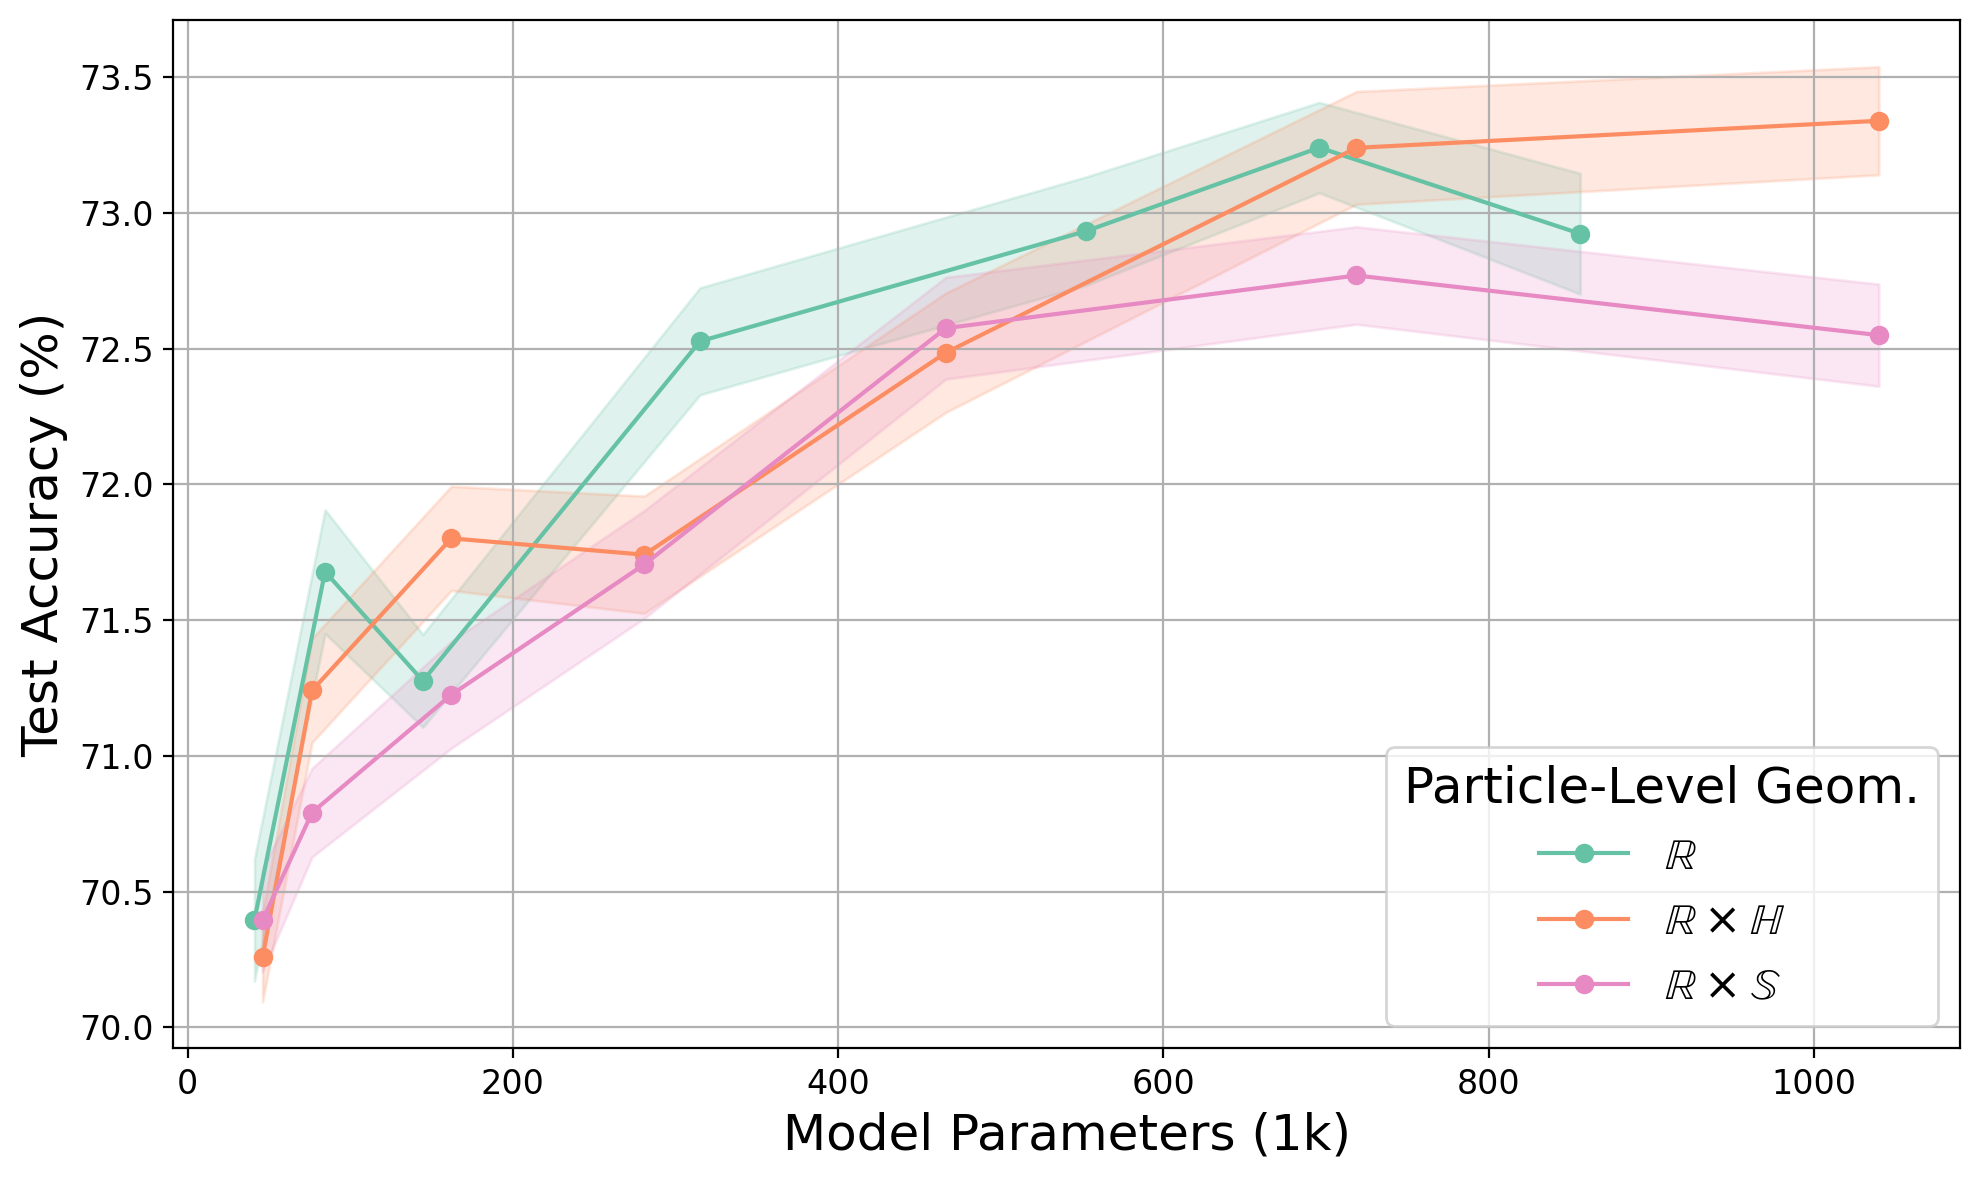

In [70]:
# Assuming 'processed_df' is your DataFrame after processing with 'calculate_mean_std'
# Define filter values
filter_values = {
    'jet_geom': 'R',
    'jet_dim': 16
}

# Plot the highest accuracies
plot_highest_accuracies(
    df=JetClass_particle_lvl_df,
    variable_to_vary='particle_dim',
    metric_column='accuracy',
    filter_values=filter_values,
#     acc_range=(0, 100),
    title='Overall Accuracy',
    plot_trans_params = True,
    PMNN=False,
    shaded_plot=True,
    shade_by_std=True,
    filter_names=['none'],  # Adjust as needed
    color_dict=None  # Use default colors or provide your own
)


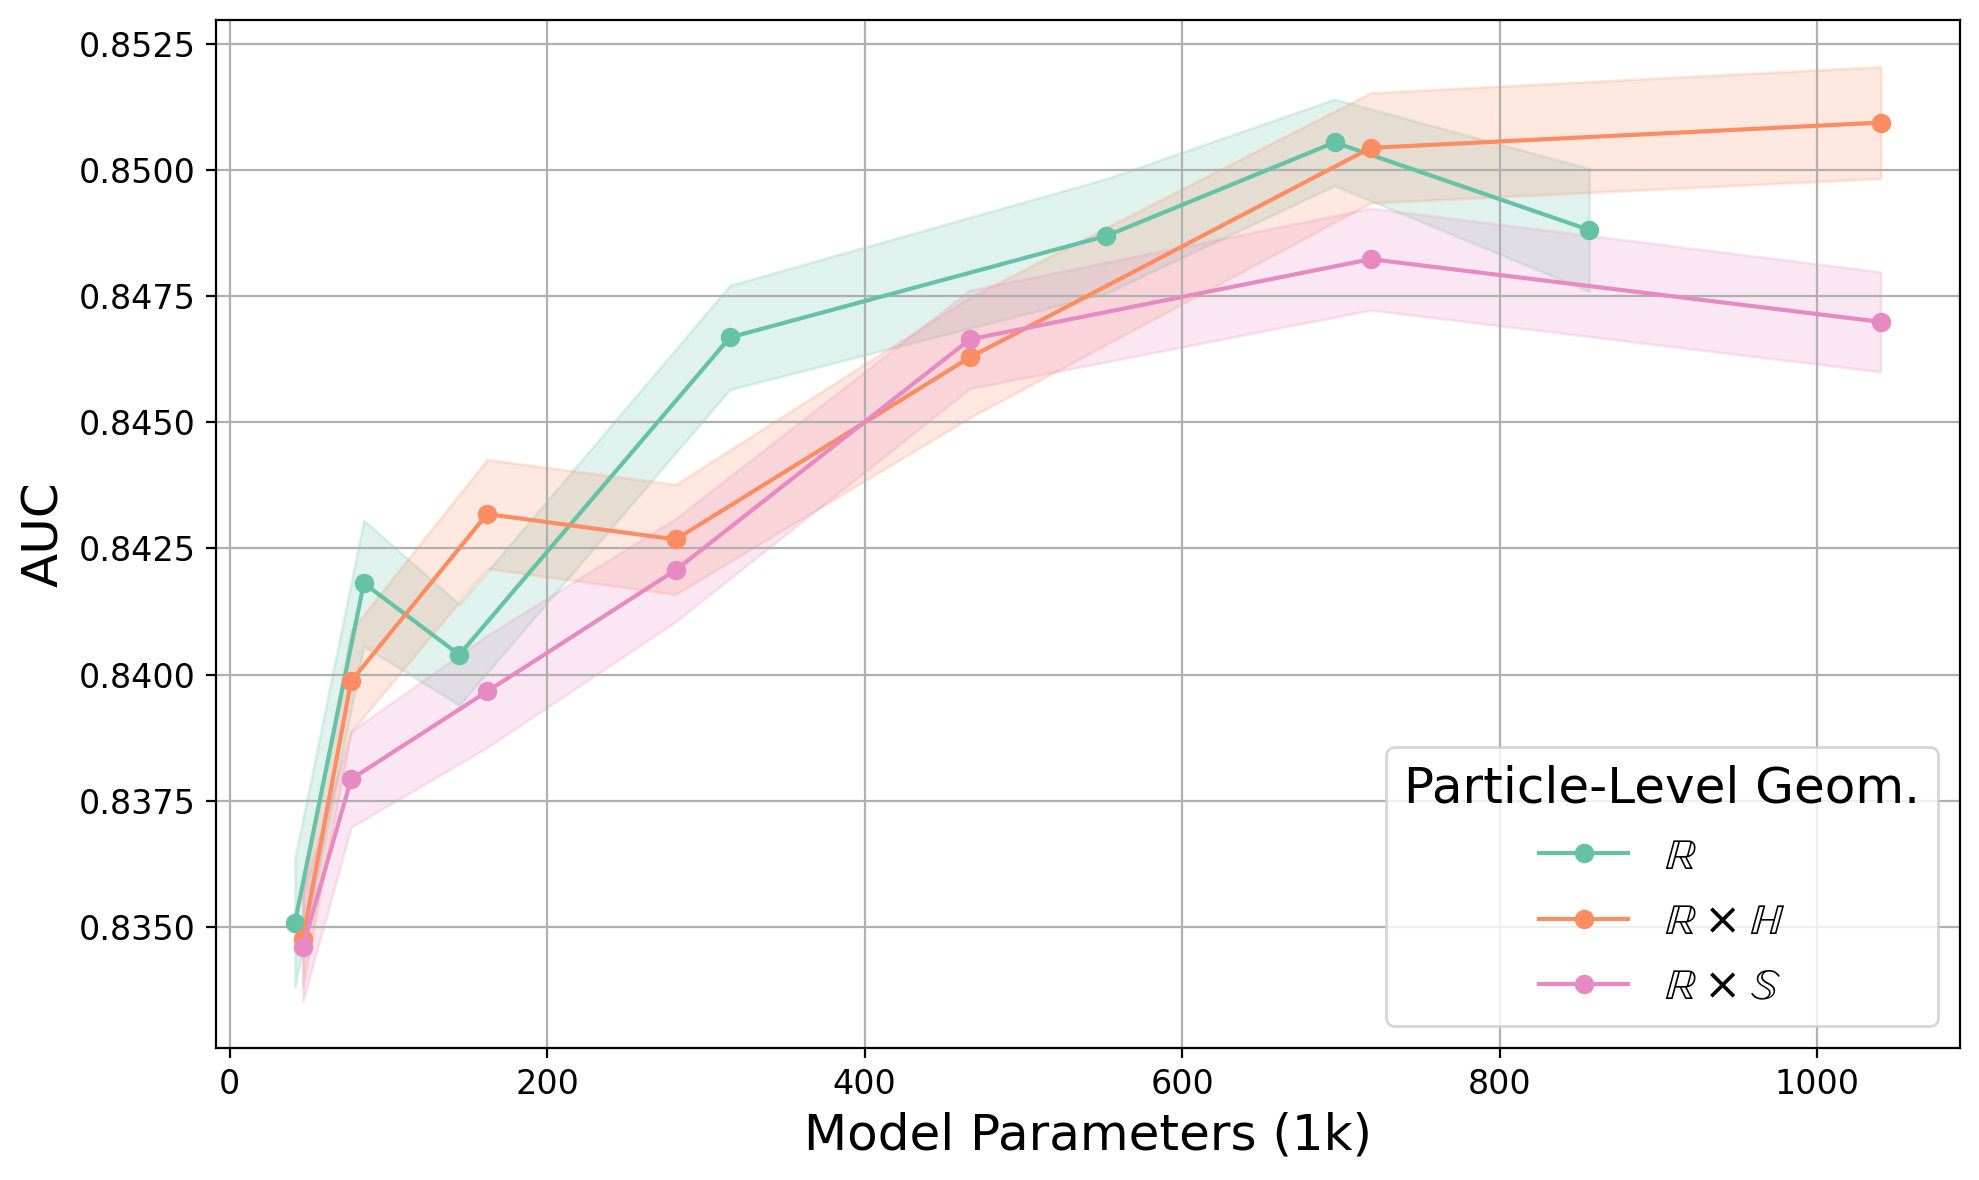

In [71]:
# Assuming 'processed_df' is your DataFrame after processing with 'calculate_mean_std'
# Define filter values
filter_values = {
    'jet_geom': 'R',
    'jet_dim': 16
}

# Plot the highest accuracies
plot_highest_accuracies(
    df=JetClass_particle_lvl_df,
    variable_to_vary='particle_dim',
    metric_column='auc',
    scale =1,
    y_label = 'AUC',
    filter_values=filter_values,
#     acc_range=(0, 100),
    title='Overall Accuracy',
    plot_trans_params = True,
    PMNN=False,
    shaded_plot=True,
    shade_by_std=True,
    filter_names=['none'],  # Adjust as needed
    color_dict=None  # Use default colors or provide your own
)


Plotting for class: Hbb


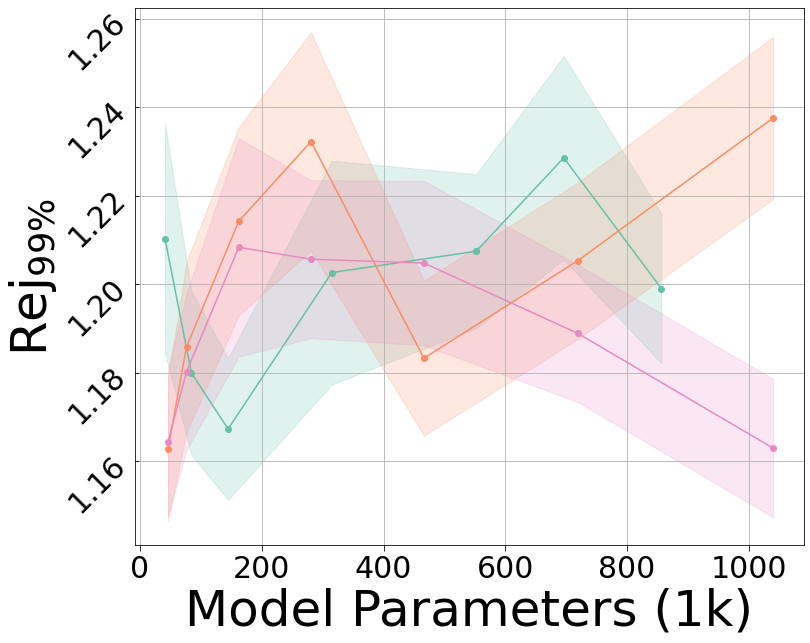

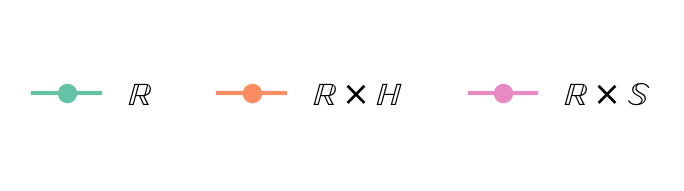

Plotting for class: Hcc


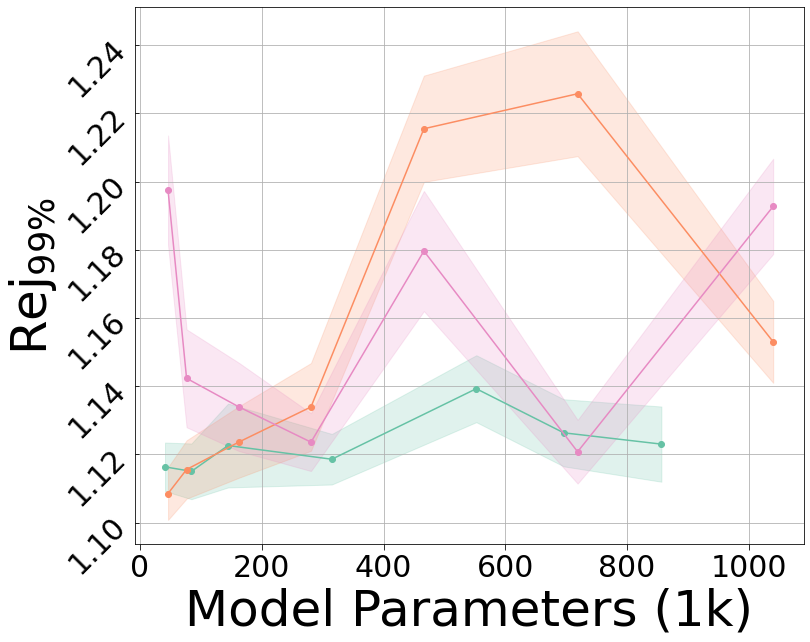

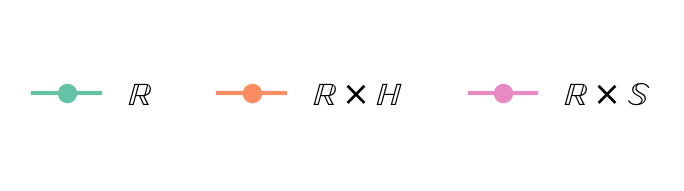

Plotting for class: Hgg


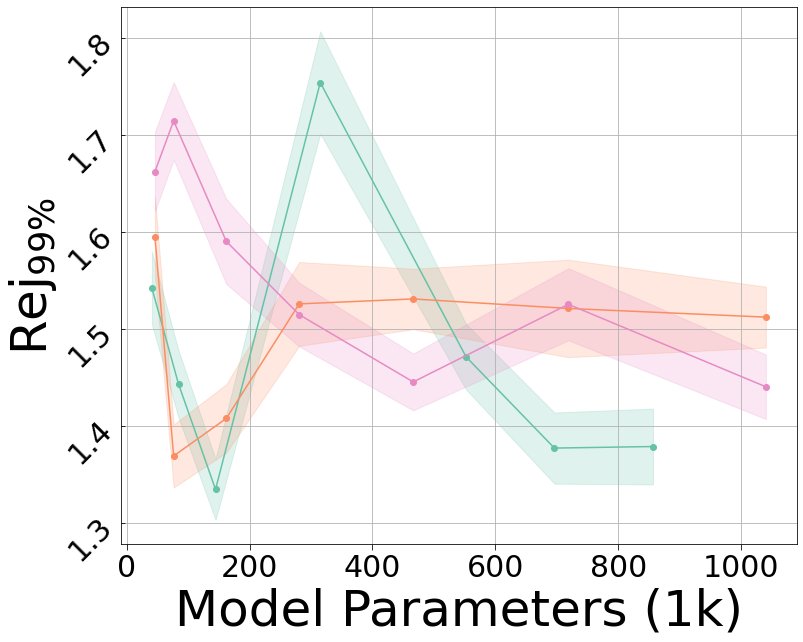

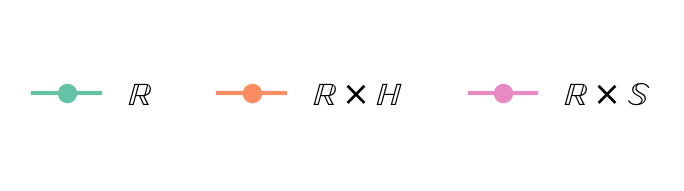

Plotting for class: H4q


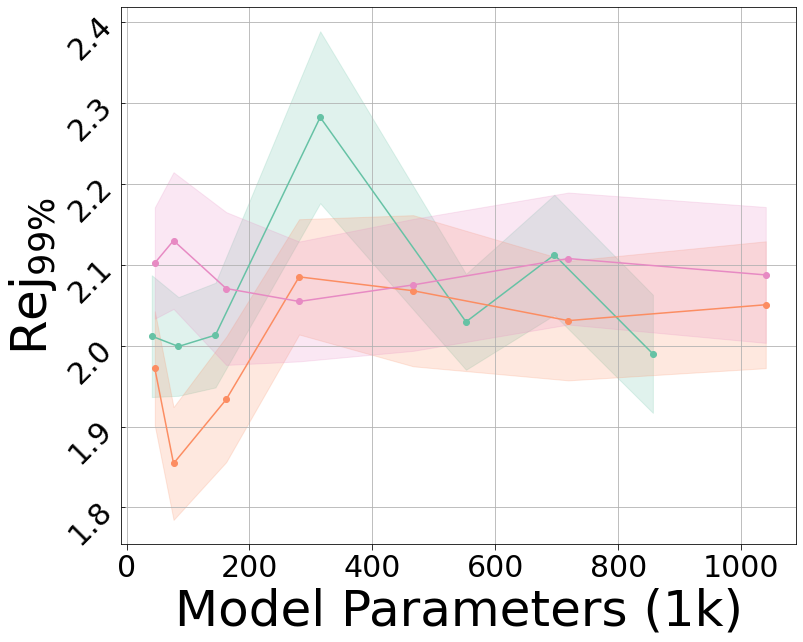

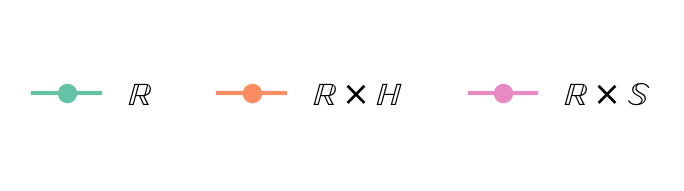

Plotting for class: Hqql


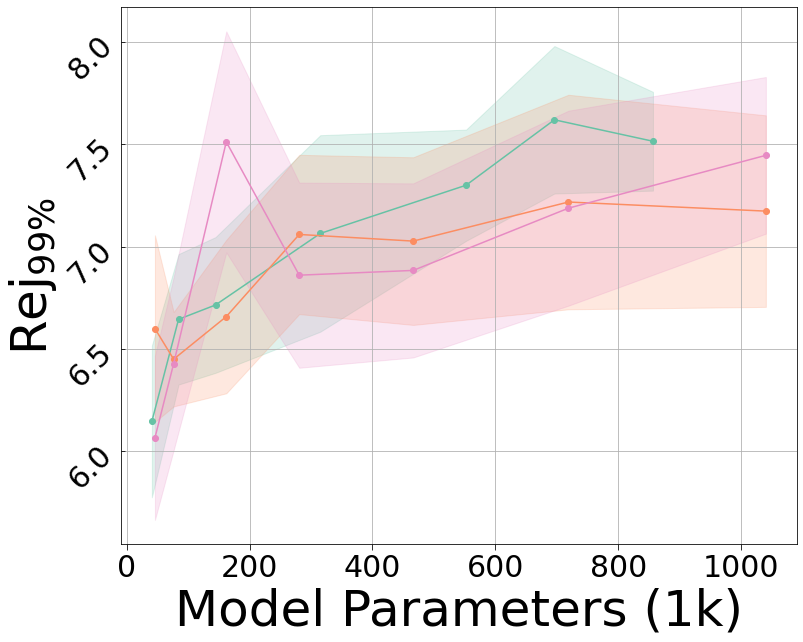

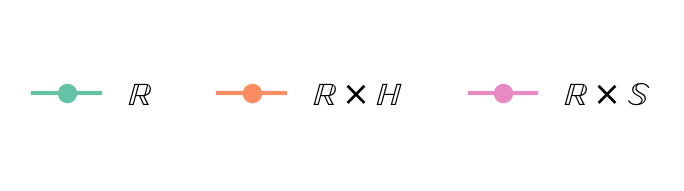

Plotting for class: Zqq


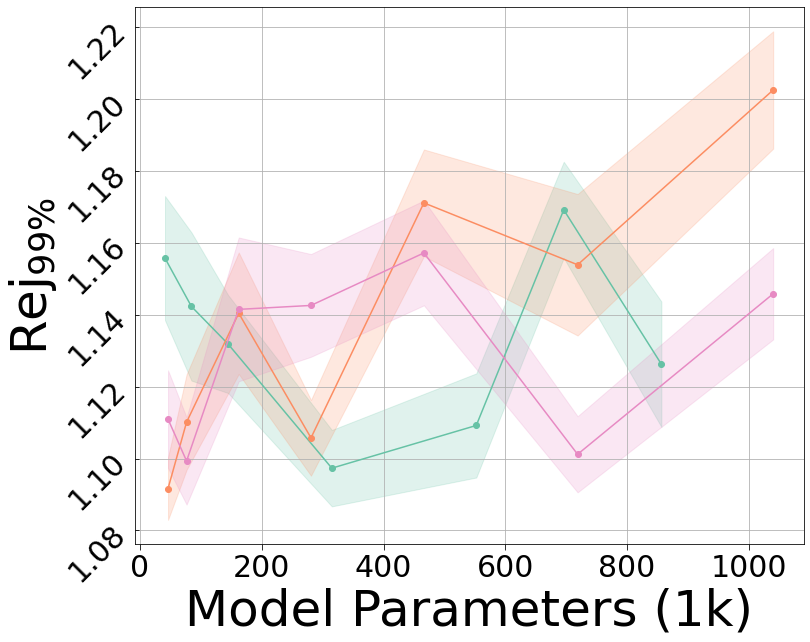

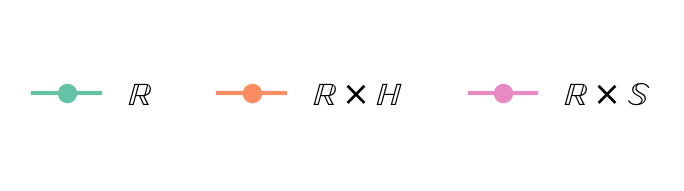

Plotting for class: Wqq


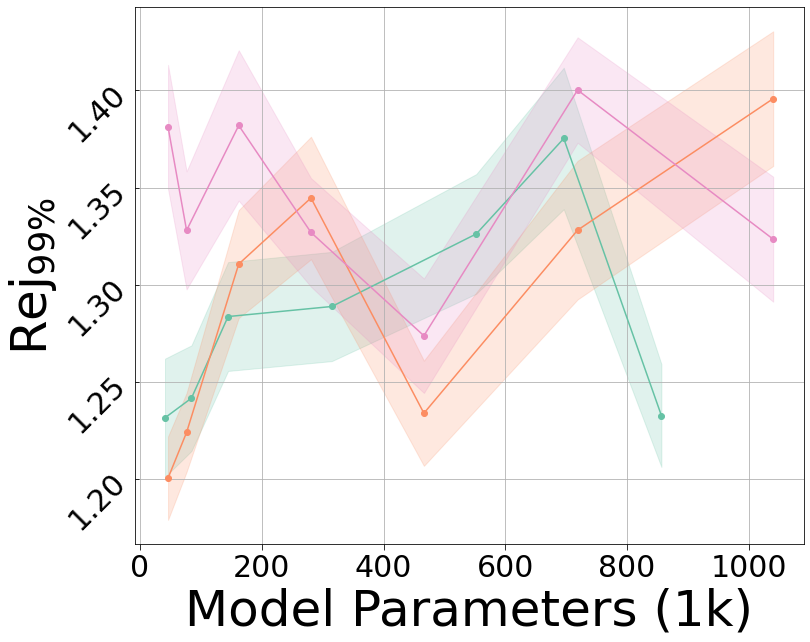

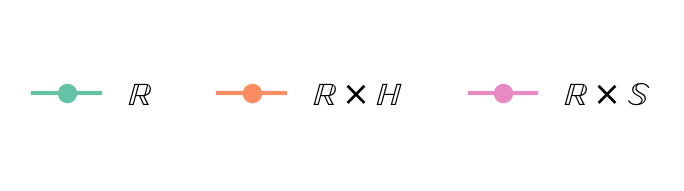

Plotting for class: Tbqq


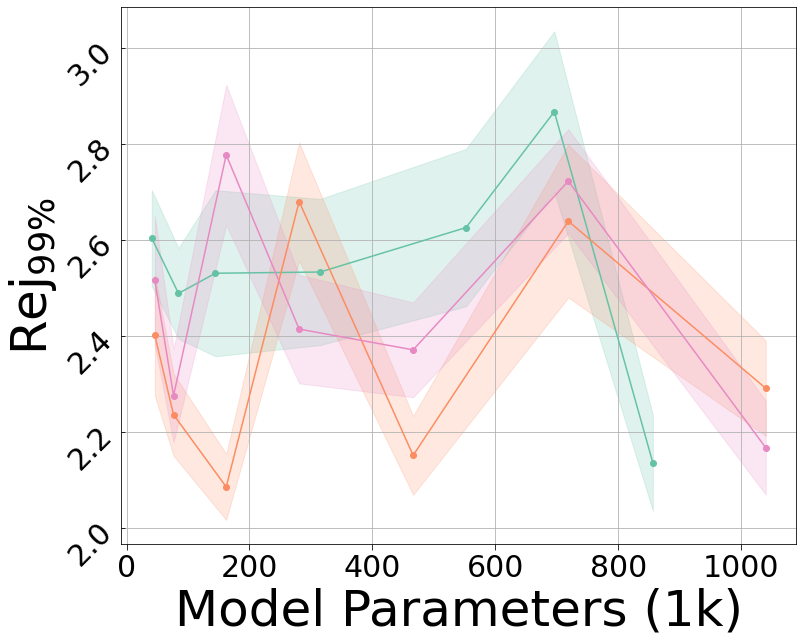

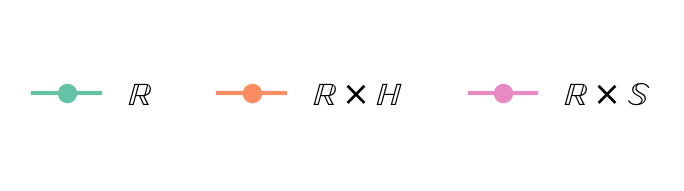

Plotting for class: Tbl


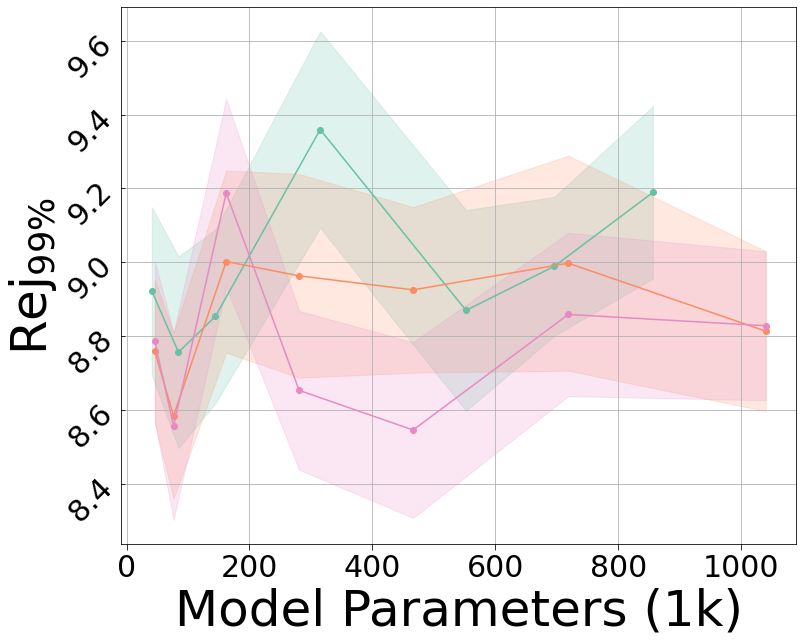

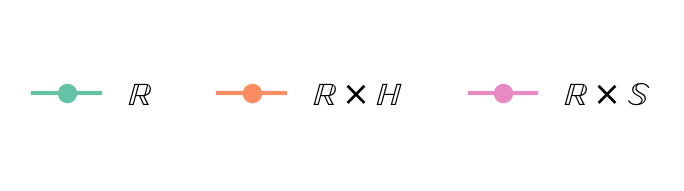

In [76]:
filter_values = {
    'jet_geom': 'R',
    'jet_dim': 16
}

signals = ['Hbb','Hcc','Hgg','H4q','Hqql','Zqq','Wqq', 'Tbqq', 'Tbl']
plot_rejections(JetClass_particle_lvl_df,
                title = 'JetClass tagging',
                rejection=99,
                classes = signals, 
                variable_to_vary='particle_dim', 
                filter_values=filter_values,
                plot_trans_params = True,
                filter_names = ['S'])

In [12]:
# Load the DataFrame
results_df = pd.read_csv('paper_JC_jet_lvl.csv').sort_values('overall_accuracy', ascending=False)

# Split the 'base_name' column to extract the relevant components
split_columns = results_df['base_name'].str.split('_final', expand=True)[0].str.split('_', expand=True)


# Assigning the last four elements to new columns
results_df[['particle_geom', 'particle_dim','jet_geom','jet_dim']] = split_columns.iloc[:, 1:]


# Convert 'particle_dim' and 'jet_dim' to integers
results_df['particle_dim'] = results_df['particle_dim'].astype(int)
results_df['jet_dim'] = results_df['jet_dim'].astype(int)

results_df['particle_dim'] = results_df.apply(
    lambda row: row['particle_dim'] * 2 if len(row['particle_geom']) > 1 else row['particle_dim'],
    axis=1
)

results_df['jet_dim'] = results_df.apply(
    lambda row: row['jet_dim'] * 2 if len(row['jet_geom']) > 1 else row['jet_dim'],
    axis=1
)

# Remove the original 'base_name' column if it's no longer needed
# results_df.drop(columns=['base_name'], inplace=True)

# Create a list of tuples for the MultiIndex
index_tuples = list(results_df[['particle_geom', 'particle_dim','jet_geom', 'jet_dim']].itertuples(index=False, name=None))

# Create a MultiIndex
index = pd.MultiIndex.from_tuples(index_tuples, names=['particle_geom', 'particle_dim','jet_geom', 'jet_dim'])

# Assign the MultiIndex to the DataFrame
results_df.index = index
results_df.drop(columns=['particle_geom', 'particle_dim','jet_geom', 'jet_dim'], inplace=True)

# Define a function to average the top 2 'overall_accuracy' for each unique (particle_geom, particle_dim) combination

df_reset = results_df.reset_index()

# Group by the columns and select the rows with the maximum 'overall_accuracy' for each group
best_rows_df = df_reset.loc[df_reset.groupby(['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim'])['overall_accuracy'].idxmax()]
best_rows_df = best_rows_df.set_index(['particle_geom', 'particle_dim', 'jet_geom', 'jet_dim'])


JetClass_jet_lvl_df = best_rows_df




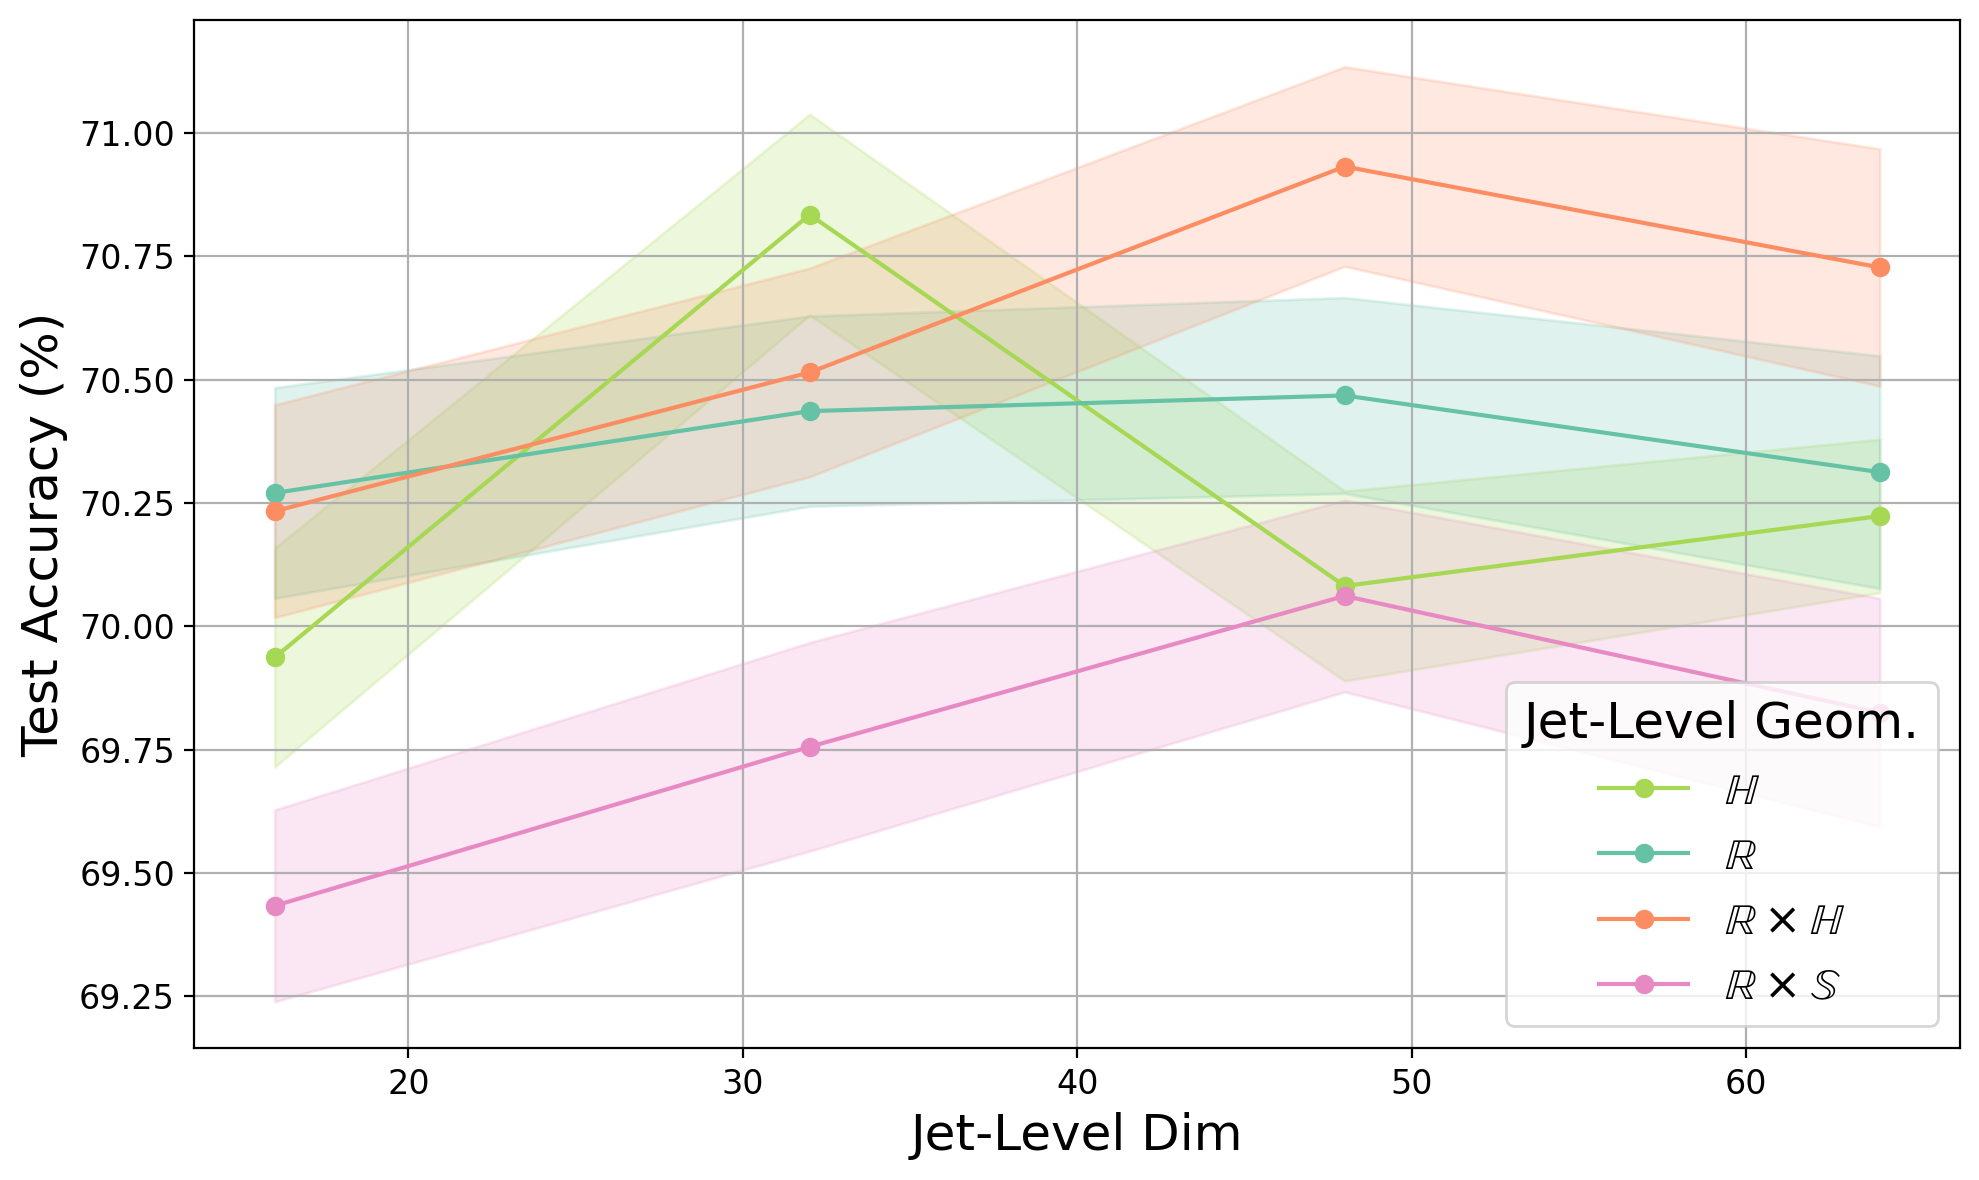

In [72]:
# Assuming 'processed_df' is your DataFrame after processing with 'calculate_mean_std'
# Define filter values
filter_values = {
    'particle_geom': 'R',
    'particle_dim': 32
}

# Plot the highest accuracies
plot_highest_accuracies(
    df=JetClass_jet_lvl_df,
    variable_to_vary='jet_dim',
    metric_column='accuracy',
    filter_values=filter_values,
#     acc_range=(0, 100),
    title='Overall Accuracy',
#     plot_trans_params = True,
    PMNN=False,
    shaded_plot=True,
    shade_by_std=True,
    filter_names=['S','HxS'],  # Adjust as needed
    color_dict=None,  # Use default colors or provide your own
)


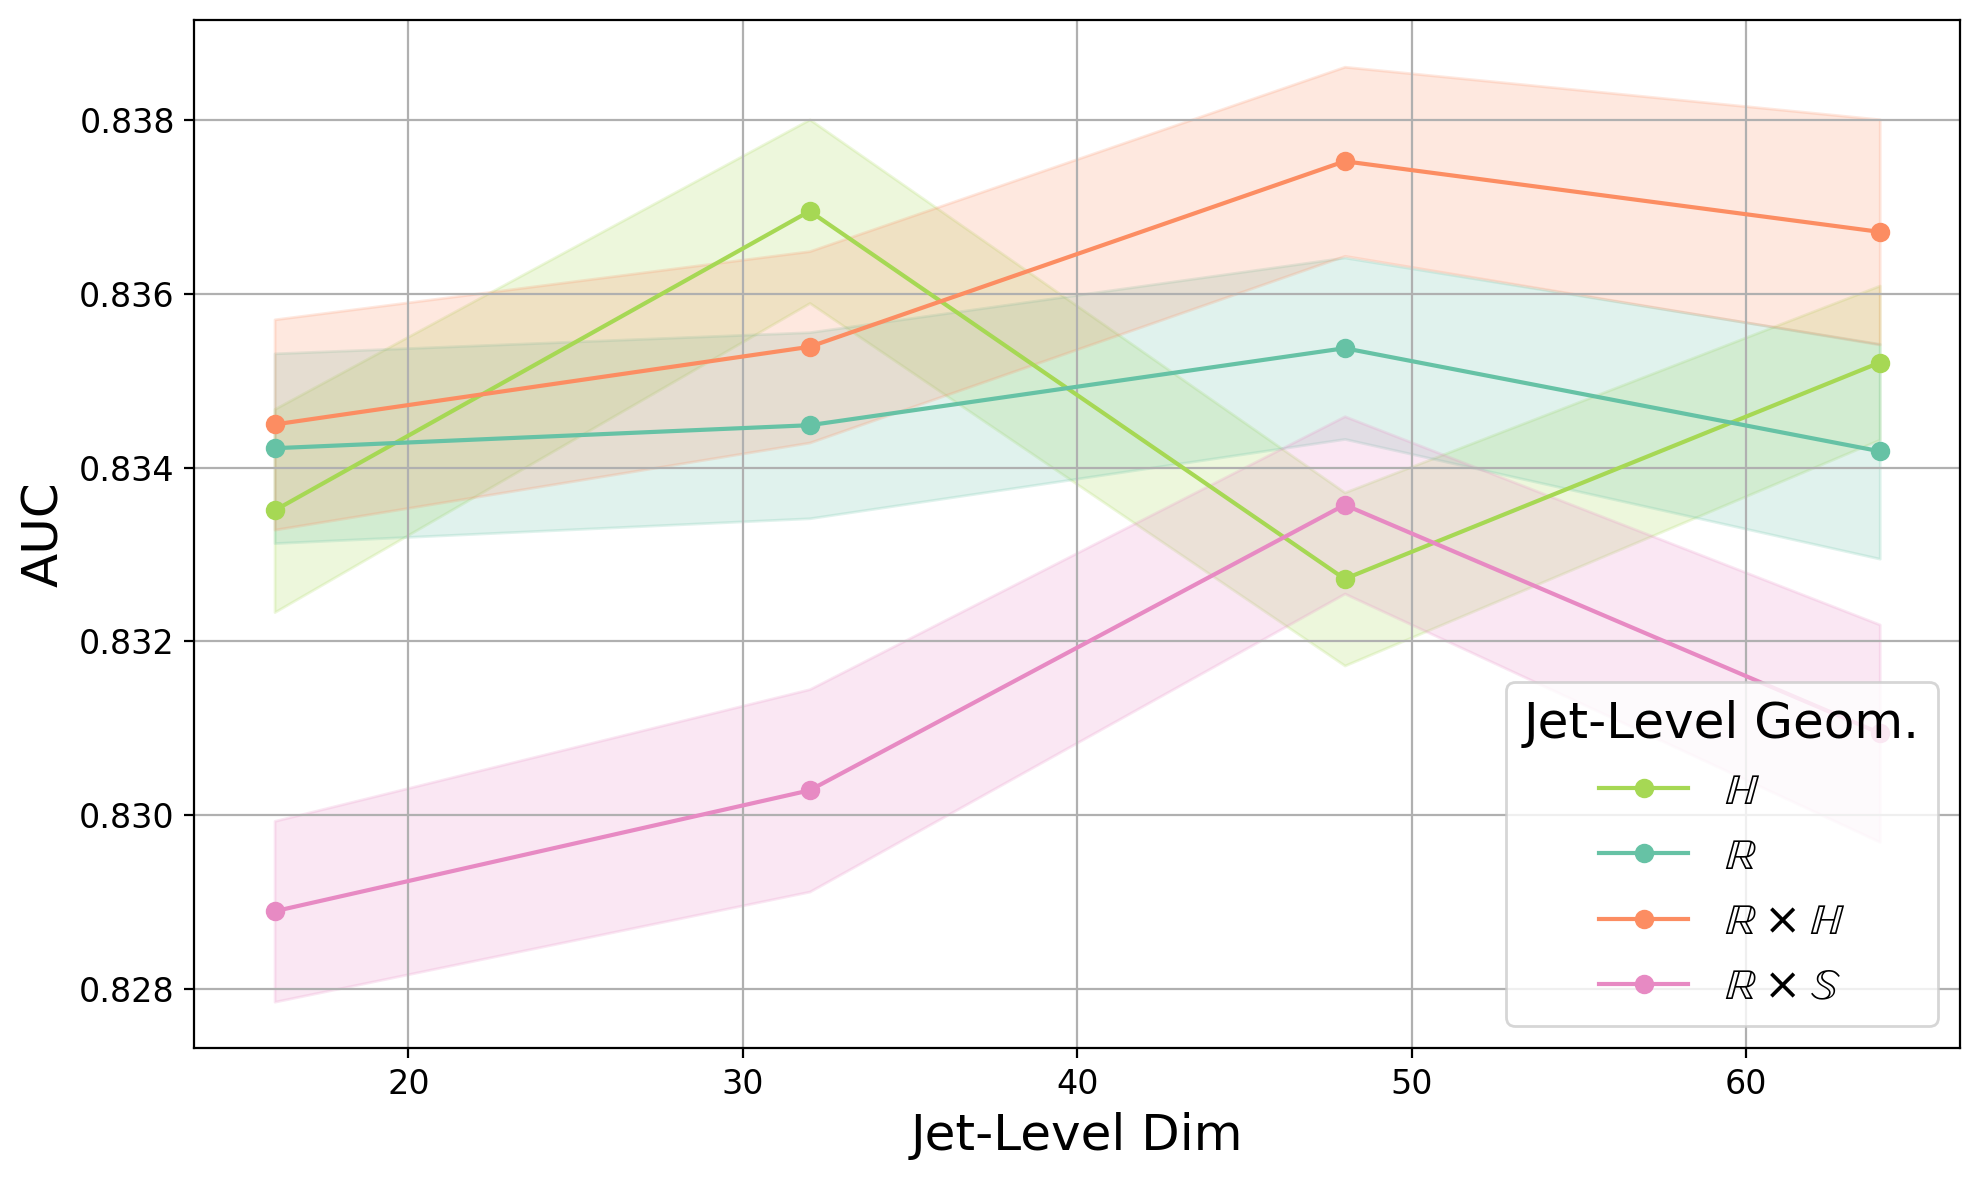

In [73]:
# Assuming 'processed_df' is your DataFrame after processing with 'calculate_mean_std'
# Define filter values
filter_values = {
    'particle_geom': 'R',
    'particle_dim': 32
}

# Plot the highest accuracies
plot_highest_accuracies(
    df=JetClass_jet_lvl_df,
    variable_to_vary='jet_dim',
    metric_column='auc',
    scale = 1,
    y_label = 'AUC',
    filter_values=filter_values,
#     acc_range=(0, 100),
    title='Overall Accuracy',
#     plot_trans_params = True,
    PMNN=False,
    shaded_plot=True,
    shade_by_std=True,
    filter_names=['S','HxS'],  # Adjust as needed
    color_dict=None,  # Use default colors or provide your own
)


Plotting for class: Hbb


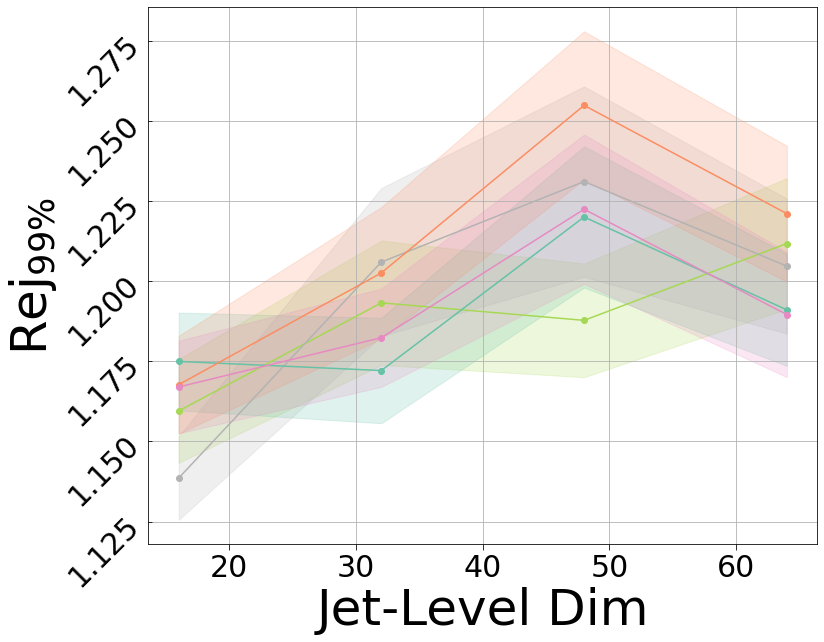

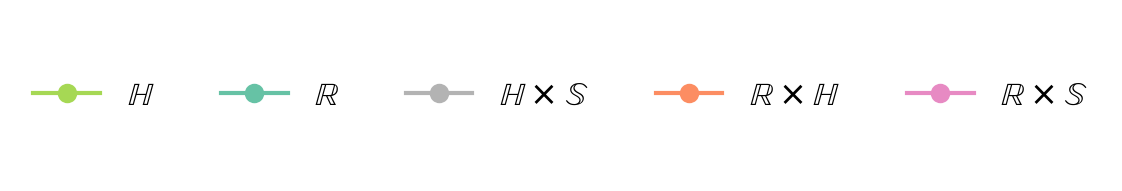

Plotting for class: Hcc


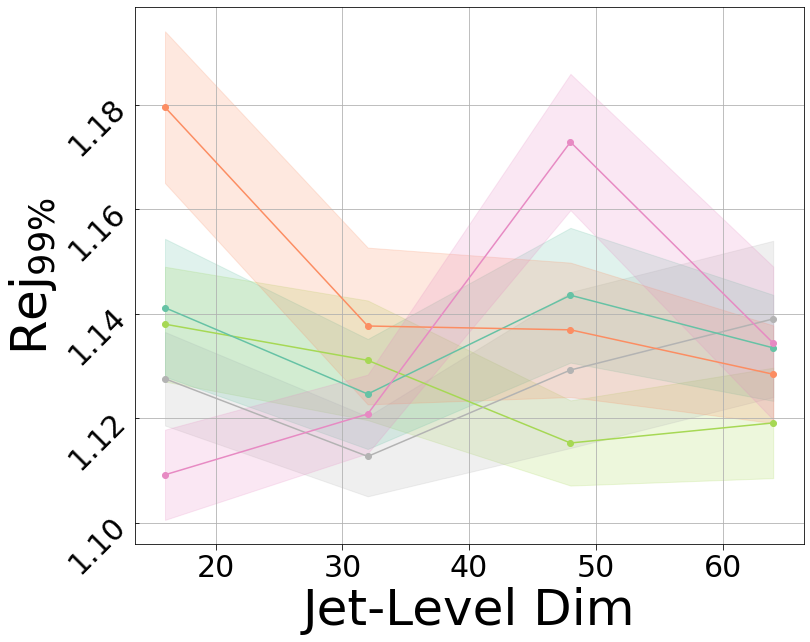

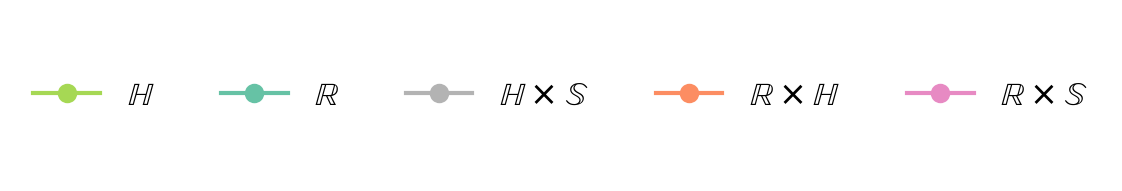

Plotting for class: Hgg


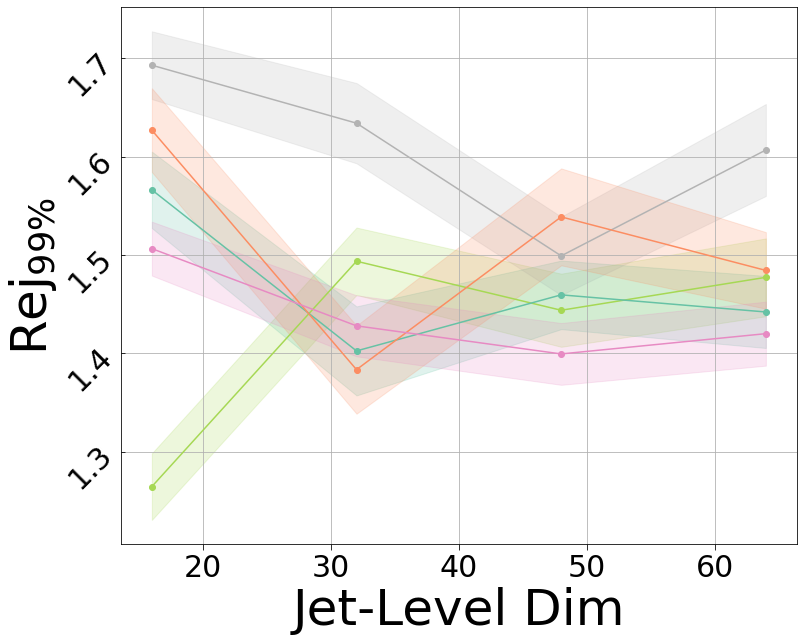

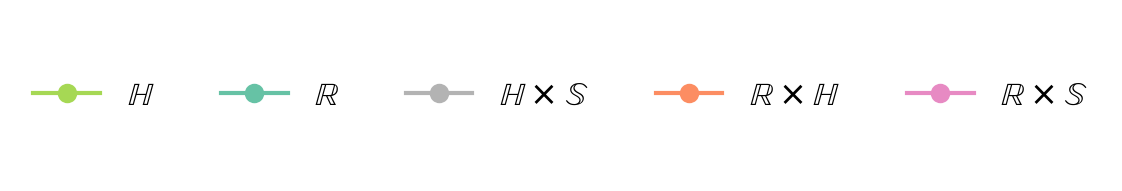

Plotting for class: H4q


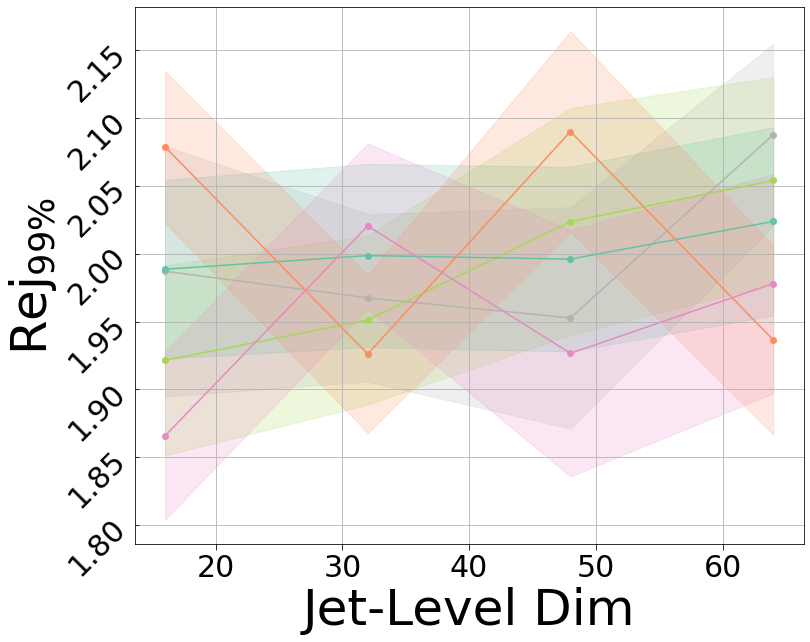

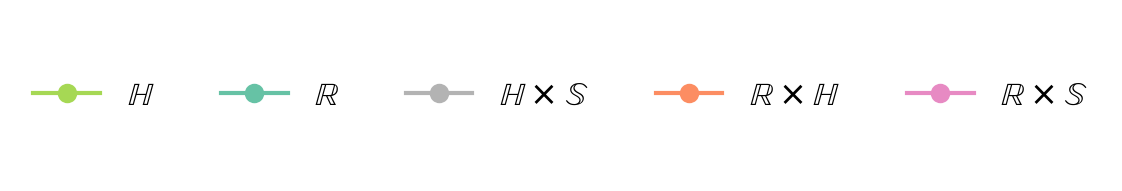

Plotting for class: Hqql


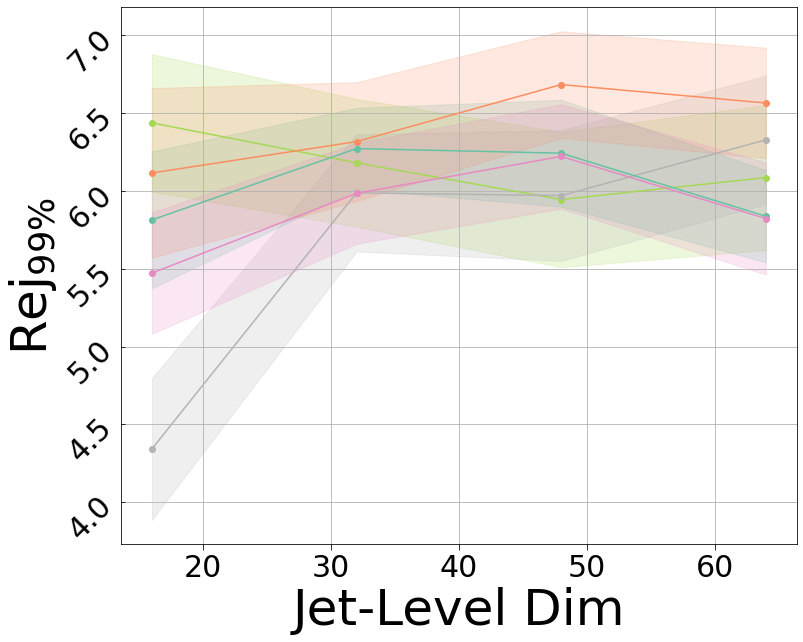

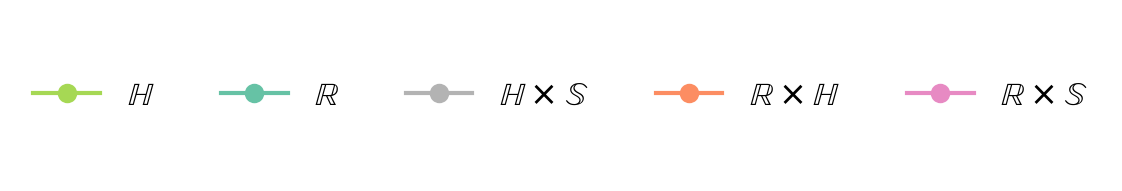

Plotting for class: Zqq


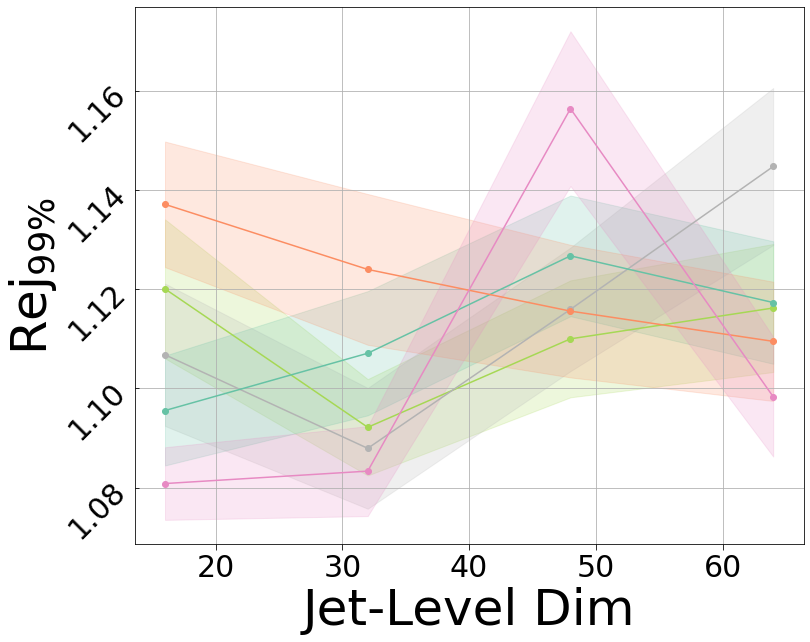

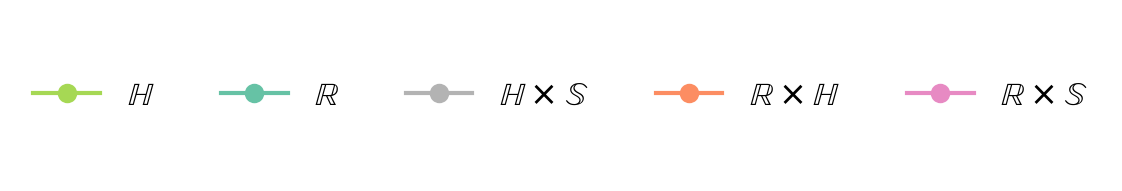

Plotting for class: Wqq


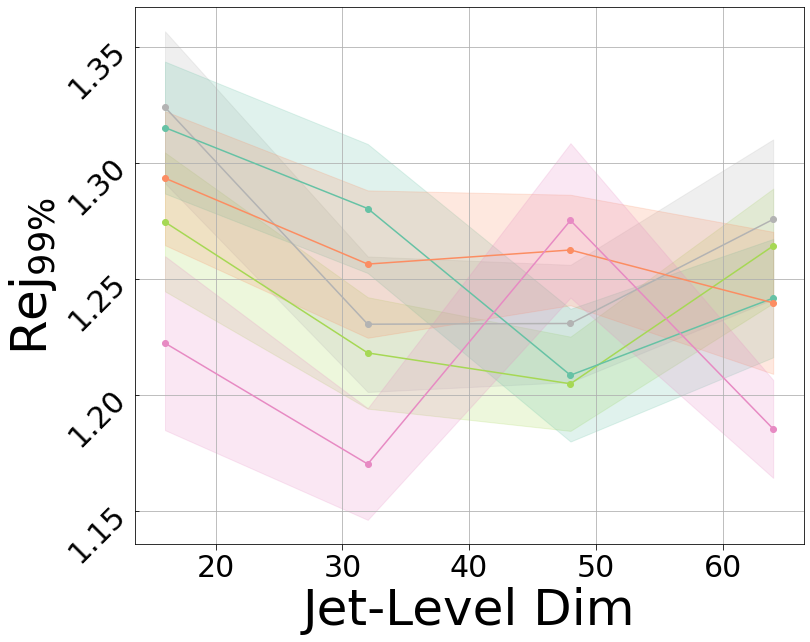

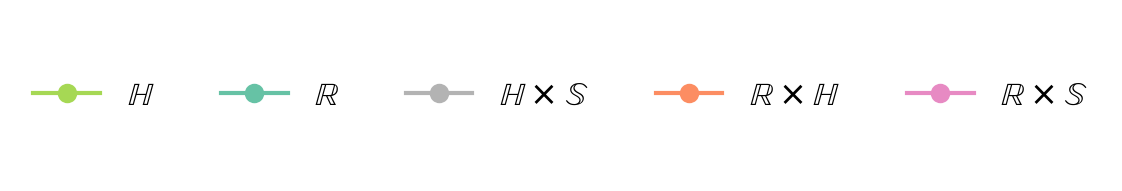

Plotting for class: Tbqq


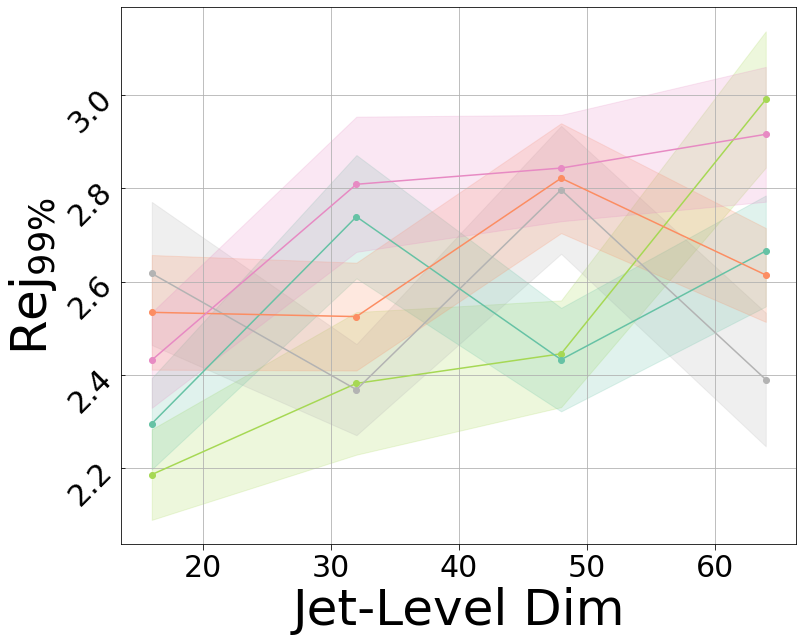

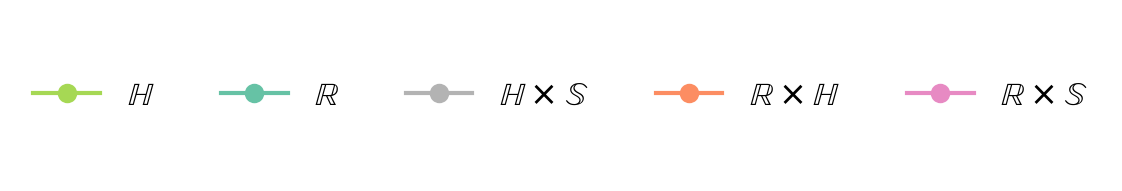

Plotting for class: Tbl


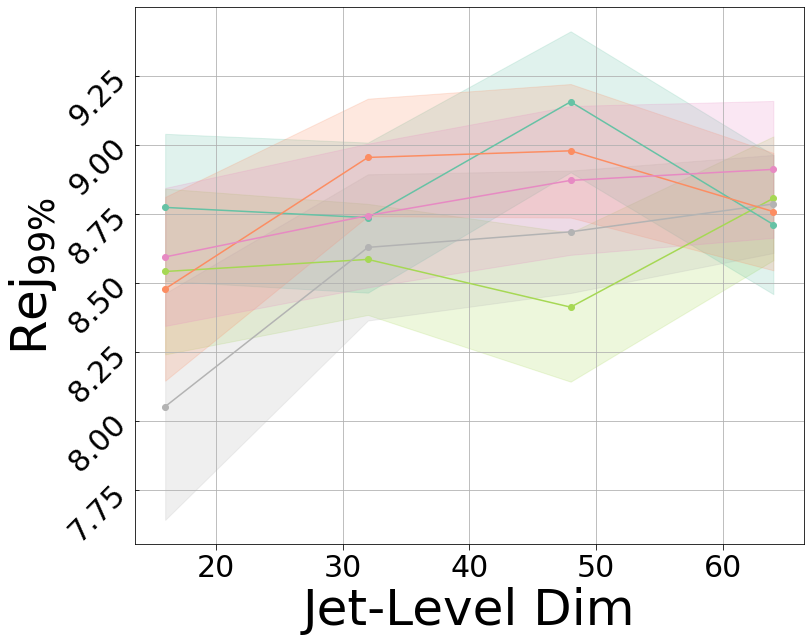

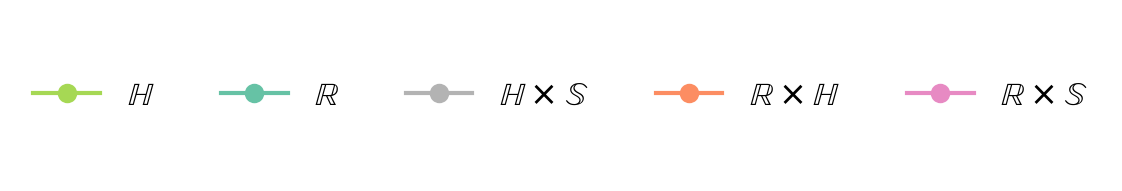

In [77]:
filter_values = {
    'particle_geom': 'R',
    'particle_dim': 32
}

signals = ['Hbb','Hcc','Hgg','H4q','Hqql','Zqq','Wqq', 'Tbqq', 'Tbl']
plot_rejections(JetClass_jet_lvl_df,
                title = 'JetClass tagging',
                rejection=99,
                classes = signals, 
                variable_to_vary='jet_dim', 
                filter_values=filter_values,
#                 plot_only_best=True, 
                filter_names = ['S'])